# Breast Cancer scRNA-seq: Data Loading and Exploration
This notebook loads the GSE180286 dataset from CancerSCEM and performs initial quality checks and UMAP visualization.

In [1]:
pip install scanpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## This is the beginning of GSE117988 data from A single-cell and spatially

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
# Load the dataset (adjust path as needed)
#adata = sc.read_h5ad("data/raw/GSE180286.h5ad")
file_path = os.path.expanduser("~/Desktop/Capstone/Raw Data/GSE117988_raw.expMatrix_Tumor.csv.gz")

# Load the tumor expression matrix
#tumor_df = pd.read_csv(file_path, index_col=0)
tumor_df = pd.read_csv(file_path, index_col=0)

# Convert to AnnData (transpose so cells are rows)
adata_tumor = sc.AnnData(tumor_df.T)
adata_tumor.var_names_make_unique()

# Optional: Save as .h5ad for faster future loading
#adata.write(os.path.expanduser("~/Desktop/Capstone/GSE117988_tumor.h5ad"))

# Quick check
print(adata_tumor.X[:5, :5])

# Show dataset dimensions
print(f"Dataset contains {adata_tumor.n_obs} cells and {adata_tumor.n_vars} genes.")

# Preview metadata
display(adata_tumor.obs.head())
display(adata_tumor.var.head())

# Check for missing values
print("Missing values in cell metadata:", adata_tumor.obs.isnull().sum().sum())
print("Missing values in gene metadata:", adata_tumor.var.isnull().sum().sum())

file_pbmc = os.path.expanduser("~/Desktop/Capstone/Raw Data/GSE117988_raw.expMatrix_PBMC.csv.gz")

pbmc_df = pd.read_csv(file_pbmc, index_col=0)
print(pbmc_df.shape)
print(pbmc_df.head())

#pbmc_df = pd.read_csv(pbmc_df, index_col=0)
adata_pbmc = sc.AnnData(pbmc_df.T)
adata_pbmc.var_names_make_unique()

# Confirm
print(f"✅ PBMC dataset: {adata_pbmc.n_obs} cells × {adata_pbmc.n_vars} genes")
print(f"✅ Tumor dataset: {adata_tumor.n_obs} cells × {adata_tumor.n_vars} genes")
print(adata_pbmc.obs.head())


[[0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Dataset contains 7431 cells and 21861 genes.


Empty DataFrame
Columns: []
Index: [AAACCTGAGGATGTAT-1, AAACCTGCAGCGATCC-1, AAACCTGGTACGAAAT-1, AAACGGGAGCTGGAAC-1, AAACGGGAGGAGTTGC-1]

Empty DataFrame
Columns: []
Index: [VP2, largeTAntigen, smallTAntigen, RP11-34P13.7, RP11-34P13.8]

Missing values in cell metadata: 0.0
Missing values in gene metadata: 0.0
(17712, 12874)
               AAACCTGAGCGAAGGG-1  AAACCTGAGGTCATCT-1  AAACCTGAGTCCTCCT-1  \
RP11-34P13.7                    0                   0                   0   
FO538757.2                      0                   0                   0   
AP006222.2                      0                   0                   0   
RP4-669L17.10                   0                   0                   0   
RP11-206L10.9                   0                   0                   0   

               AAACCTGCACCAGCAC-1  AAACCTGGTAACGTTC-1  AAACCTGGTAAGGATT-1  \
RP11-34P13.7                    0                   0                   0   
FO538757.2                      0                   0                   0   
AP006222.2                      0                   0                   0   
RP4-669L17.10                   0                   0                   0   
RP11-206L10.9                   0                   0          

In [39]:
#tumor_df= pd.read_csv("GSE117988_raw.expMatrix_Tumor.csv.gz", index_col=0, compression='gzip')

print(pbmc_df.iloc[:5, :5]) 
print(tumor_df.shape)

               AAACCTGAGCGAAGGG-1  AAACCTGAGGTCATCT-1  AAACCTGAGTCCTCCT-1  \
RP11-34P13.7                    0                   0                   0   
FO538757.2                      0                   0                   0   
AP006222.2                      0                   0                   0   
RP4-669L17.10                   0                   0                   0   
RP11-206L10.9                   0                   0                   0   

               AAACCTGCACCAGCAC-1  AAACCTGGTAACGTTC-1  
RP11-34P13.7                    0                   0  
FO538757.2                      0                   0  
AP006222.2                      0                   0  
RP4-669L17.10                   0                   0  
RP11-206L10.9                   0                   0  
(21861, 7431)


In [40]:
adata_pbmc.obs['total_counts'] = adata_pbmc.X.sum(axis=1)
adata_pbmc.obs['ghost_cell'] = adata_pbmc.obs['total_counts'] < 1500

print(adata_pbmc.obs['ghost_cell'].value_counts())
print(adata_pbmc.obs['total_counts'].describe())

ghost_cell
True     10307
False     2567
Name: count, dtype: int64
count    12874.000000
mean      1162.772565
std        705.670986
min        213.000000
25%        748.000000
50%        969.000000
75%       1365.000000
max      11211.000000
Name: total_counts, dtype: float64


In [41]:
adata_tumor.obs['total_counts'] = adata_tumor.X.sum(axis=1)
adata_tumor.obs['ghost_cell'] = adata_tumor.obs['total_counts'] < 1500
adata_tumor.obs['source'] = 'Tumor'
adata_tumor.obs['total_counts'] = adata_tumor.X.sum(axis=1)
adata_tumor.obs['ghost_cell'] = adata_tumor.obs['total_counts'] < 1500
adata_tumor.obs['source'] = 'Tumor'
adata_pbmc.obs['source'] = 'PBMC'
adata_tumor.obs['ghost_cell'] = adata_tumor.obs['total_counts'] < 1500
adata_pbmc.obs['ghost_cell'] = adata_pbmc.obs['total_counts'] < 1500


combined_df = pd.concat([
    adata_tumor.obs[['source', 'ghost_cell']],
    adata_pbmc.obs[['source', 'ghost_cell']]
])

ghost_summary = (
    combined_df.groupby("source")["ghost_cell"]
    .agg(["sum", "count"])
    .assign(ghost_pct=lambda x: 100 * x["sum"] / x["count"])
)

print("📊 Ghost Cell Summary:")
print(ghost_summary)




📊 Ghost Cell Summary:
          sum  count  ghost_pct
source                         
PBMC    10307  12874  80.060587
Tumor      91   7431   1.224600


In [42]:
print(adata_pbmc)

AnnData object with n_obs × n_vars = 12874 × 17712
    obs: 'total_counts', 'ghost_cell', 'source'


In [43]:
print(adata_tumor.obs.columns)
print(adata_pbmc.obs.columns)
import scanpy as sc

# Annotate mitochondrial genes
adata_pbmc.var['mt'] = adata_pbmc.var_names.str.startswith('MT-')
print(adata_pbmc.var_names[:10])

adata_pbmc.var['mt'] = adata_pbmc.var_names.str.upper().str.startswith('MT-')
MT_GENES = [
    'MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3',
    'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND4L', 'MT-ND5', 'MT-ND6'
]
found_mt_genes = [gene for gene in MT_GENES if gene in adata_pbmc.var_names]
print(f"Found {len(found_mt_genes)} mitochondrial genes:", found_mt_genes)
sc.pp.calculate_qc_metrics(adata_pbmc, qc_vars=['mt'], inplace=True)

ghost_threshold = 1500
mito_threshold = 10  # 10% mitochondrial RNA content

adata_pbmc.obs['ghost_cell'] = (
    (adata_pbmc.obs['total_counts'] < ghost_threshold) |
    (adata_pbmc.obs['pct_counts_mt'] > mito_threshold)
)
print(adata_pbmc.obs['ghost_cell'].value_counts())
print(adata_pbmc.obs['pct_counts_mt'].describe())







Index(['total_counts', 'ghost_cell', 'source'], dtype='object')
Index(['total_counts', 'ghost_cell', 'source'], dtype='object')
Index(['RP11-34P13.7', 'FO538757.2', 'AP006222.2', 'RP4-669L17.10',
       'RP11-206L10.9', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17'],
      dtype='object')
Found 13 mitochondrial genes: ['MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND4L', 'MT-ND5', 'MT-ND6']
ghost_cell
True     10400
False     2474
Name: count, dtype: int64
count    12874.000000
mean         5.950001
std          4.193062
min          0.000000
25%          4.279614
50%          5.609496
75%          7.070707
max         85.626283
Name: pct_counts_mt, dtype: float64


In [44]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [45]:
adata_tumor.var['mt'] = adata_tumor.var_names.isin(MT_GENES)

# Compute QC metrics
sc.pp.calculate_qc_metrics(adata_tumor, qc_vars=['mt'], inplace=True)

# Redefine ghost cells using the same logic
adata_tumor.obs['ghost_cell'] = (
    (adata_tumor.obs['total_counts'] < 1500) |
    (adata_tumor.obs['pct_counts_mt'] > 10)
)
adata_pbmc.obs['source'] = 'PBMC'
adata_tumor.obs['source'] = 'Tumor'

combined_obs = pd.concat([
    adata_pbmc.obs[['source', 'ghost_cell']],
    adata_tumor.obs[['source', 'ghost_cell']]
])

ghost_summary = (
    combined_obs.groupby('source')['ghost_cell']
    .agg(['sum', 'count'])
    .assign(ghost_pct=lambda x: 100 * x['sum'] / x['count'])
)

print("📊 Ghost Cell Summary (Low RNA or High Mito):")
print(ghost_summary)
print(adata_tumor.obs.columns)


📊 Ghost Cell Summary (Low RNA or High Mito):
          sum  count  ghost_pct
source                         
PBMC    10400  12874  80.782973
Tumor     594   7431   7.993541
Index(['total_counts', 'ghost_cell', 'source', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'],
      dtype='object')


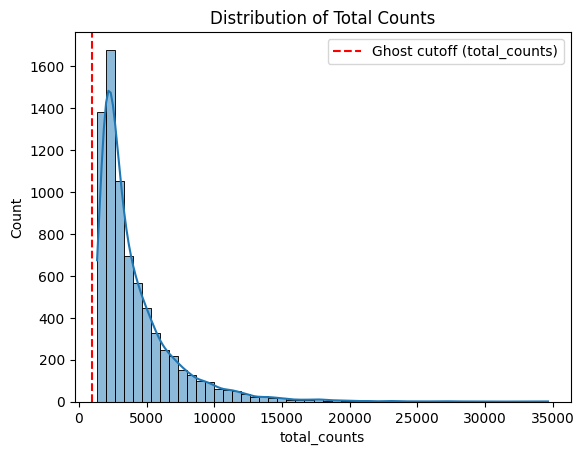

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(adata_tumor.obs['total_counts'], bins=50, kde=True)
plt.axvline(1000, color='red', linestyle='--', label='Ghost cutoff (total_counts)')
plt.title("Distribution of Total Counts")
plt.legend()
plt.show()

/Users/adi/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


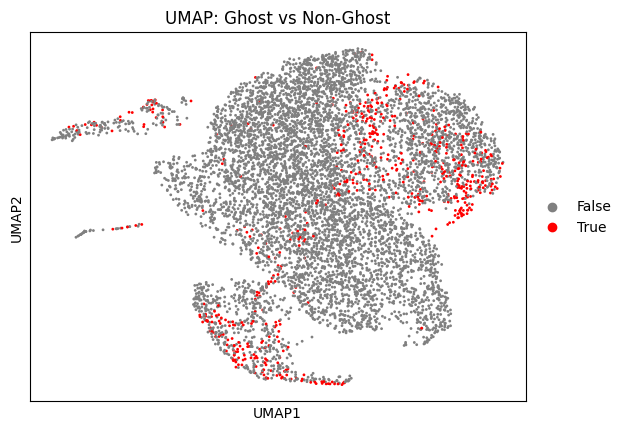

In [47]:
# Step 1: PCA
sc.tl.pca(adata_tumor, svd_solver='arpack')

# Step 2: Compute neighborhood graph
sc.pp.neighbors(adata_tumor, n_neighbors=10, n_pcs=40)

# Step 3: UMAP embedding
sc.tl.umap(adata_tumor)

# Step 4: Plot ghost vs non-ghost cells
sc.pl.umap(adata_tumor, color='ghost_cell', title='UMAP: Ghost vs Non-Ghost', palette=["gray", "red"])


In [48]:
print(adata_pbmc.obs[['total_counts', 'pct_counts_mt', 'ghost_cell']].head())




                    total_counts  pct_counts_mt  ghost_cell
AAACCTGAGCGAAGGG-1          1896       2.900844       False
AAACCTGAGGTCATCT-1           751       5.858855        True
AAACCTGAGTCCTCCT-1          1228       6.921824        True
AAACCTGCACCAGCAC-1          1919       3.595623       False
AAACCTGGTAACGTTC-1           698       5.873926        True


In [49]:
# Step 1: Compute QC metrics (% mitochondrial genes, total counts)
adata_pbmc.var['mt'] = adata_pbmc.var_names.str.upper().str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_pbmc, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# View QC metrics
adata_pbmc.obs[['total_counts', 'n_genes_by_counts', 'pct_counts_mt']].head()


total_counts  n_genes_by_counts  pct_counts_mt
AAACCTGAGCGAAGGG-1          1896                517       2.900844
AAACCTGAGGTCATCT-1           751                328       5.858855
AAACCTGAGTCCTCCT-1          1228                380       6.921824
AAACCTGCACCAGCAC-1          1919                573       3.595623
AAACCTGGTAACGTTC-1           698                263       5.873926

In [50]:
# Step 2: Define ghost cells using same thresholds as tumor
adata_pbmc.obs['is_ghost'] = (
    (adata_pbmc.obs['total_counts'] < 1500) |
    (adata_pbmc.obs['pct_counts_mt'] > 15)
).astype(int)

# Count ghost vs non-ghost
adata_pbmc.obs['is_ghost'].value_counts()

is_ghost
1    10329
0     2545
Name: count, dtype: int64

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/3544054972.py:5: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata_pbmc.concatenate(
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adi/Library/Python/3.9/lib/python/site-packages/pandas/core/util/hashing.py:330: RuntimeWarning: invalid value encountered in cast
  vals.astype(str).astype(object), hash_key, encoding
/Users/adi/L

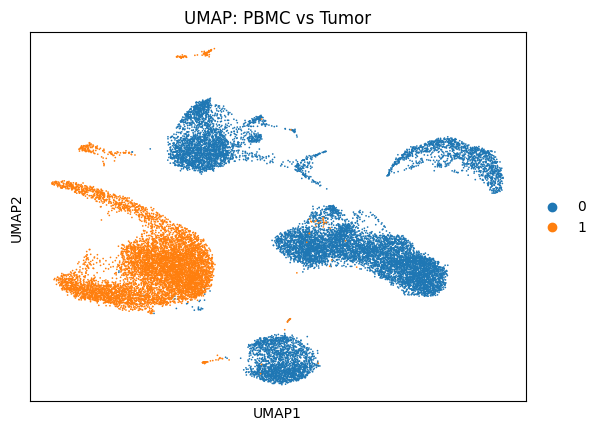

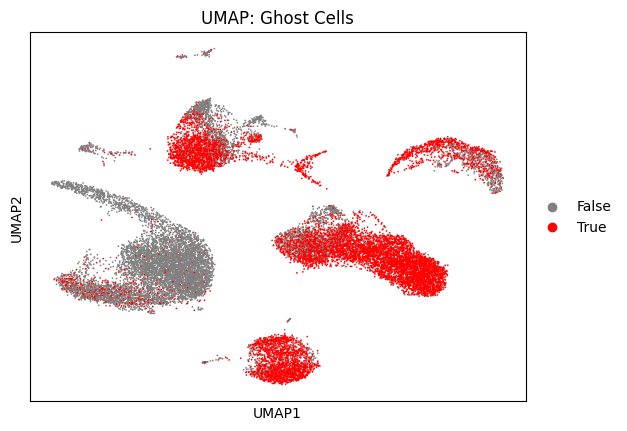

In [51]:
adata_pbmc.obs['source'] = 'PBMC'
adata_tumor.obs['source'] = 'Tumor'

# Use the same gene space (intersection)
adata_combined = adata_pbmc.concatenate(
    adata_tumor,
    batch_key="source",    # keeps track of PBMC vs Tumor
    index_unique=None,
    join="inner"           # intersect genes
)

sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)
sc.pp.highly_variable_genes(adata_combined, n_top_genes=2000, subset=True)
sc.pp.scale(adata_combined, max_value=10)
sc.tl.pca(adata_combined, svd_solver='arpack')
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_combined)

sc.pl.umap(adata_combined, color='source', title='UMAP: PBMC vs Tumor')
sc.pl.umap(adata_combined, color='ghost_cell', title='UMAP: Ghost Cells', palette=['gray', 'red'])


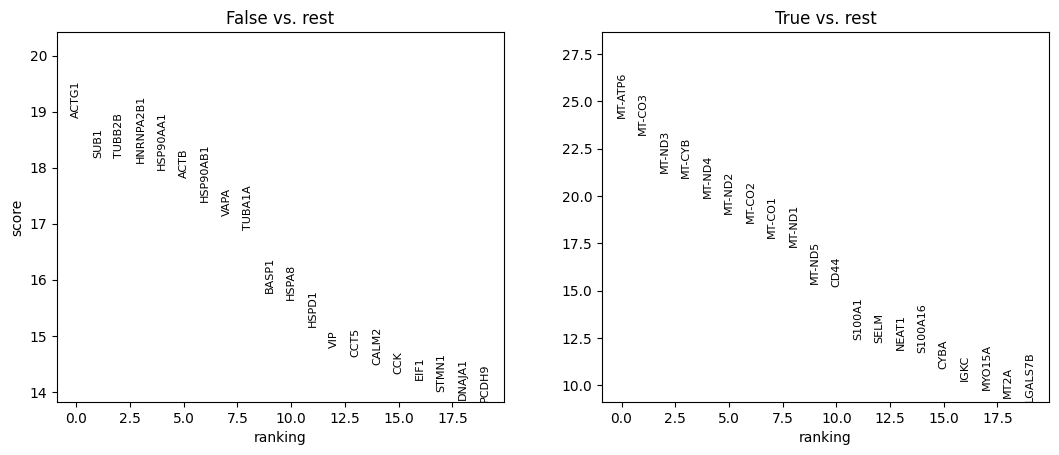

['MT-ATP6' 'MT-CO3' 'MT-ND3' 'MT-CYB' 'MT-ND4' 'MT-ND2' 'MT-CO2' 'MT-CO1'
 'MT-ND1' 'MT-ND5' 'CD44' 'S100A1' 'SELM' 'NEAT1' 'S100A16' 'CYBA' 'IGKC'
 'MYO15A' 'MT2A' 'LGALS7B']


In [52]:
sc.pp.log1p(adata_tumor) 
adata_tumor.obs['ghost_cell'] = adata_tumor.obs['ghost_cell'].astype('category')

sc.tl.rank_genes_groups(adata_tumor, groupby='ghost_cell', method='wilcoxon')
sc.pl.rank_genes_groups(adata_tumor, n_genes=20, sharey=False)
top_genes = adata_tumor.uns['rank_genes_groups']['names']['True'][:20]
print(top_genes)

In [53]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


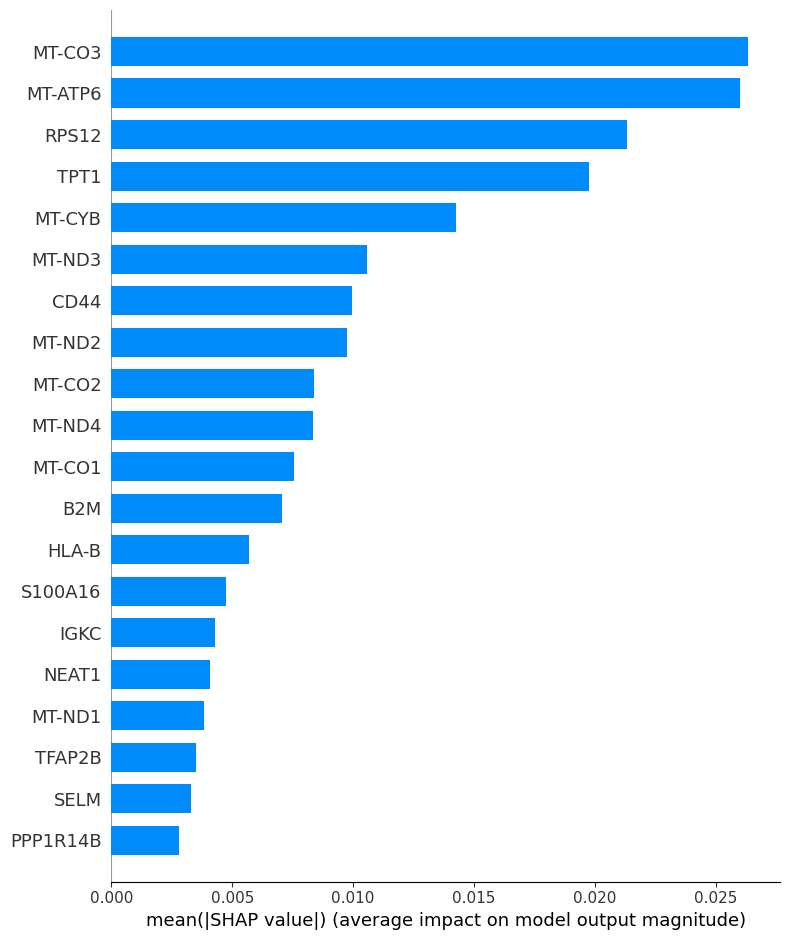

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Step 1: Extract top 50 DE genes
top_50_genes = adata_tumor.uns['rank_genes_groups']['names']['True'][:50].tolist()

# Step 2: Prepare input features and target
X = adata_tumor[:, top_50_genes].X.toarray()  # dense matrix of top genes
y = adata_tumor.obs['ghost_cell'].astype(int).values  # binary target

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Explain model with SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Select SHAP values for class 1
shap_values_class1 = shap_values[:, :, 1]

gene_names = adata_tumor[:, top_50_genes].var_names.tolist()
shap.summary_plot(shap_values_class1, X_test, feature_names=gene_names, plot_type="bar")





In [55]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


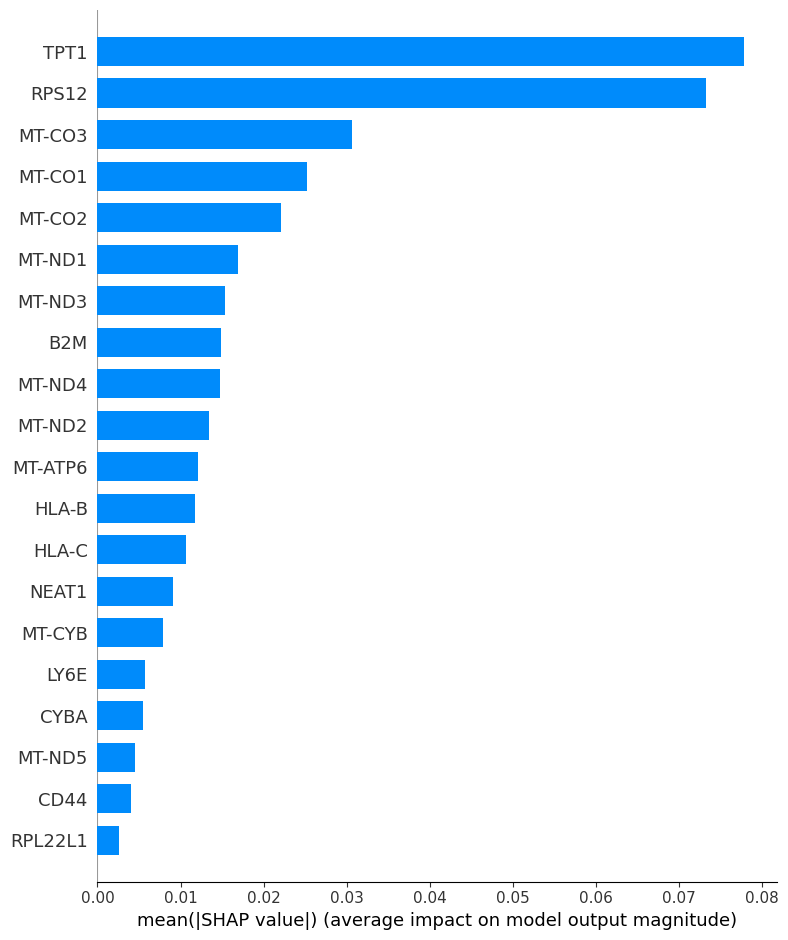

In [56]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
top_50_genes = adata_tumor.uns['rank_genes_groups']['names']['True'][:50].tolist()

# Step 2: Filter for valid genes in PBMC dataset
valid_genes = [g for g in top_50_genes if g in adata_pbmc.var_names]

# Step 3: Prepare PBMC features and target
X_pbmc = adata_pbmc[:, valid_genes].X
y_pbmc = adata_pbmc.obs['ghost_cell'].astype(int).values

# Convert to dense if sparse
if hasattr(X_pbmc, 'toarray'):
    X_pbmc = X_pbmc.toarray()

# Optional: Subsample to avoid memory overload
X_pbmc = X_pbmc[:2000]
y_pbmc = y_pbmc[:2000]

# Step 4: Train/test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pbmc, y_pbmc, test_size=0.2, random_state=42)

# Step 5: Train RandomForest model
clf_pbmc = RandomForestClassifier(n_estimators=100, random_state=42)
clf_pbmc.fit(X_train_p, y_train_p)

# Step 6: SHAP explainer
explainer_pbmc = shap.TreeExplainer(clf_pbmc)
shap_vals_pbmc = explainer_pbmc.shap_values(X_test_p)

# Step 7: Use SHAP values for class 1 (ghost cells)
shap_vals_pbmc_class1 = shap_vals_pbmc[:, :, 1]

# Step 8: Gene names
gene_names = adata_pbmc[:, valid_genes].var_names.tolist()

# Step 9: SHAP bar plot
shap.summary_plot(shap_vals_pbmc_class1, X_test_p, feature_names=gene_names, plot_type="bar")



In [57]:
pip install gseapy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [58]:
# Extract top 20 SHAP-ranked genes (adjust 'shap_values_class1' from SHAP model)
import numpy as np
import pandas as pd
# Make sure ghost_cell is categorical
adata_tumor.obs['ghost_cell'] = adata_tumor.obs['ghost_cell'].astype('category')

# Run DE analysis (if not already done)
sc.tl.rank_genes_groups(adata_tumor, groupby='ghost_cell', method='wilcoxon')

# Extract top genes for ghost cells (category "True")
top_genes = adata_tumor.uns['rank_genes_groups']['names']['True'][:20].tolist()
print("Top DE Genes:", top_genes)



Top DE Genes: ['MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-CYB', 'MT-ND4', 'MT-ND2', 'MT-CO2', 'MT-CO1', 'MT-ND1', 'MT-ND5', 'CD44', 'S100A1', 'SELM', 'NEAT1', 'S100A16', 'CYBA', 'IGKC', 'MYO15A', 'MT2A', 'LGALS7B']


In [59]:
import gseapy as gp
import pandas as pd


libraries = gp.get_library_name()  

# Step 2: Filter to relevant ones
relevant_libraries = [lib for lib in libraries if any(key in lib for key in [
    "GO_Biological_Process", "MSigDB_Hallmark", "KEGG", "Reactome"
])]

print("Filtered gene sets to choose from:")
for lib in relevant_libraries:
    print("-", lib)

gene_set = relevant_libraries[0]  
top_de_genes = [
    'SRGN', 'VIM', 'HLA-DPB1', 'HLA-DPA1', 'HLA-DRB5',
    'TYROBP', 'HLA-DQA1', 'CTSS', 'AIF1', 'HLA-DRA',
    'S100A11', 'IFITM3', 'LAPTM5', 'HLA-DQB1', 'HLA-DRB1',
    'C1QB', 'C1QC', 'HLA-DMA', 'C1QA', 'LYZ'
]

# Step 2: Use a single gene set
#gene_set = "MSigDB_Hallmark_2020"  # or try "GO_Biological_Process_2023"

# Step 3: Run enrichment
enr = gp.enrichr(
    gene_list=top_de_genes,
    gene_sets=gene_set,
    organism='Human',
    outdir=None,  # avoid file writing
    cutoff=0.05,
    no_plot=True
)

# Step 4: Display top enriched terms
top_results = enr.results.sort_values("Adjusted P-value").head(10)
display(top_results[["Term", "Adjusted P-value", "Overlap", "Genes"]])


Filtered gene sets to choose from:
- GO_Biological_Process_2021
- GO_Biological_Process_2023
- GO_Biological_Process_2025
- KEGG_2013
- KEGG_2015
- KEGG_2016
- KEGG_2019_Human
- KEGG_2019_Mouse
- KEGG_2021_Human
- MSigDB_Hallmark_2020
- Reactome_2022
- Reactome_Pathways_2024


Term  Adjusted P-value  \
0   antigen processing and presentation of exogeno...      3.235462e-14   
1   antigen processing and presentation of peptide...      3.235462e-14   
2   antigen processing and presentation of exogeno...      3.235462e-14   
3   cellular response to interferon-gamma (GO:0071...      1.429780e-11   
4   interferon-gamma-mediated signaling pathway (G...      1.944715e-11   
5      T cell receptor signaling pathway (GO:0050852)      6.769035e-09   
6   antigen receptor-mediated signaling pathway (G...      1.758431e-08   
7   regulation of immune effector process (GO:0002...      6.883136e-08   
8    cytokine-mediated signaling pathway (GO:0019221)      1.183313e-07   
10             cell junction disassembly (GO:0150146)      5.275337e-07   

   Overlap                                              Genes  
0     9/98  HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;CTSS;HLA-DQA...  
1    9/100  HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;CTSS;HLA-DQA...  
2    9/103  HLA-DRB5;HLA-DMA;HLA-DPB1;HLA-DRA;CTSS;HLA-DQA...  
3    8/121  HLA-DRB5;HLA-DPB1;HLA-DRA;AIF1;HLA-DQA1;HLA-DR...  
4     7/68  HLA-DRB5;HLA-DPB1;HLA-DRA;HLA-DQA1;HLA-DRB1;HL...  
5    7/158  HLA-DRB5;HLA-DPB1;HLA-DRA;HLA-DQA1;HLA-DRB1;HL...  
6    7/185  HLA-DRB5;HLA-DPB1;HLA-DRA;HLA-DQA1;HLA-DRB1;HL...  
7     5/53                    C1QB;C1QA;HLA-DRA;HLA-DRB1;C1QC  
8    9/621  IFITM3;HLA-DRB5;HLA-DPB1;HLA-DRA;VIM;HLA-DQA1;...  
10     3/6                                     C1QB;C1QA;C1QC

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/1426575901.py:10: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata_tumor.concatenate(adata_pbmc, batch_key="sample_origin", index_unique=None)
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adi/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expec

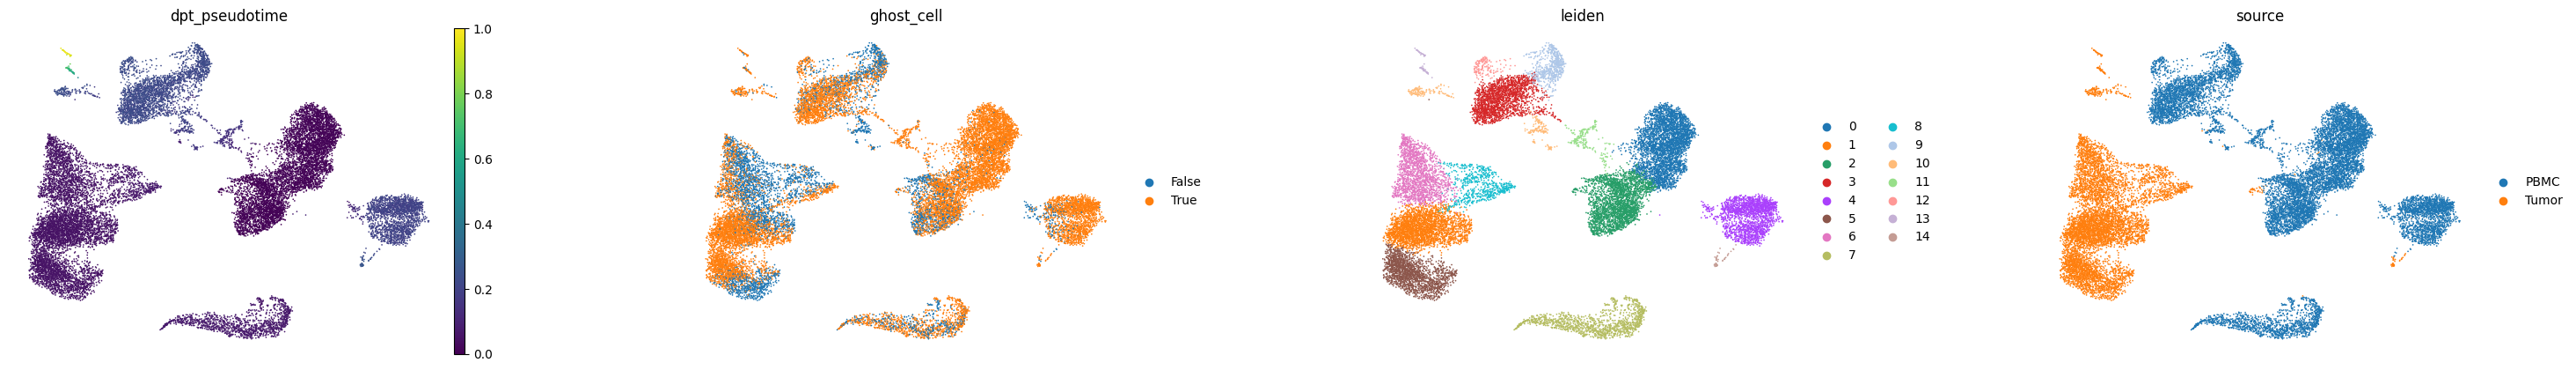

In [171]:

### Pseudotime analysis
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 0: Combine tumor and PBMC datasets
adata_tumor.obs["source"] = "Tumor"
adata_pbmc.obs["source"] = "PBMC"
adata_combined = adata_tumor.concatenate(adata_pbmc, batch_key="sample_origin", index_unique=None)

# Step 1: Annotate mitochondrial genes
mt_genes = ['MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3',
            'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND4L', 'MT-ND5', 'MT-ND6']
adata_combined.var["mt"] = adata_combined.var_names.isin(mt_genes)

# Step 2: Compute QC metrics and define ghost cells
sc.pp.calculate_qc_metrics(adata_combined, qc_vars=["mt"], inplace=True)
adata_combined.obs["ghost_cell"] = (
    (adata_combined.obs["total_counts"] < 1500) |
    (adata_combined.obs["pct_counts_mt"] > 10)
)

# Step 3: Highly variable genes
sc.pp.highly_variable_genes(adata_combined, flavor="seurat_v3", n_top_genes=2000)

# Step 4: Filter to HVGs and preprocess
adata_combined = adata_combined[:, adata_combined.var.highly_variable]
sc.pp.normalize_total(adata_combined)
sc.pp.log1p(adata_combined)
sc.pp.scale(adata_combined, max_value=10)

# Step 5: Dimensionality reduction and clustering
sc.tl.pca(adata_combined, svd_solver='arpack')
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_combined, resolution=0.5)
sc.tl.paga(adata_combined)
sc.tl.umap(adata_combined)

# Step 6: Select ghost root cell for pseudotime
ghost_cells = adata_combined.obs.query("ghost_cell == True")
valid_cluster = ghost_cells["leiden"].value_counts().idxmax()
root_cell = ghost_cells[ghost_cells["leiden"] == valid_cluster]["total_counts"].idxmin()
adata_combined.uns["iroot"] = adata_combined.obs_names.get_loc(root_cell)

# Step 7: Run diffusion pseudotime (DPT)
sc.tl.dpt(adata_combined)

# Step 8: Plot results
sc.pl.umap(
    adata_combined,
    color=["dpt_pseudotime", "ghost_cell", "leiden", "source"],
    wspace=0.4,
    frameon=False
)


In [132]:
import scanpy as sc

# Run PCA if not already done
if "X_pca" not in adata_combined.obsm:
    sc.tl.pca(adata_combined, svd_solver='arpack')

# Build neighborhood graph
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=40)

# Run Leiden clustering (resolution can be tuned)
sc.tl.leiden(adata_combined, resolution=0.5)
print(adata_combined.obs["leiden"].value_counts())


leiden
0     55153
1     47810
2     32525
3     29175
4     23994
5     23111
6     21810
7     20718
8     17037
9     14947
10    13501
11    10958
12    10791
13    10529
14     9628
15     8580
16     7144
17     6903
18     6724
19     6720
20     6044
21     5918
22     5440
23     5155
24     4272
25     4107
26     3794
27     3513
28     2298
29     1406
30     1056
31      384
Name: count, dtype: int64


In [134]:
pip install scanpy infercnvpy mudata


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


  0%|          | 0/85 [00:00<?, ?it/s]

... storing 'source' as categorical


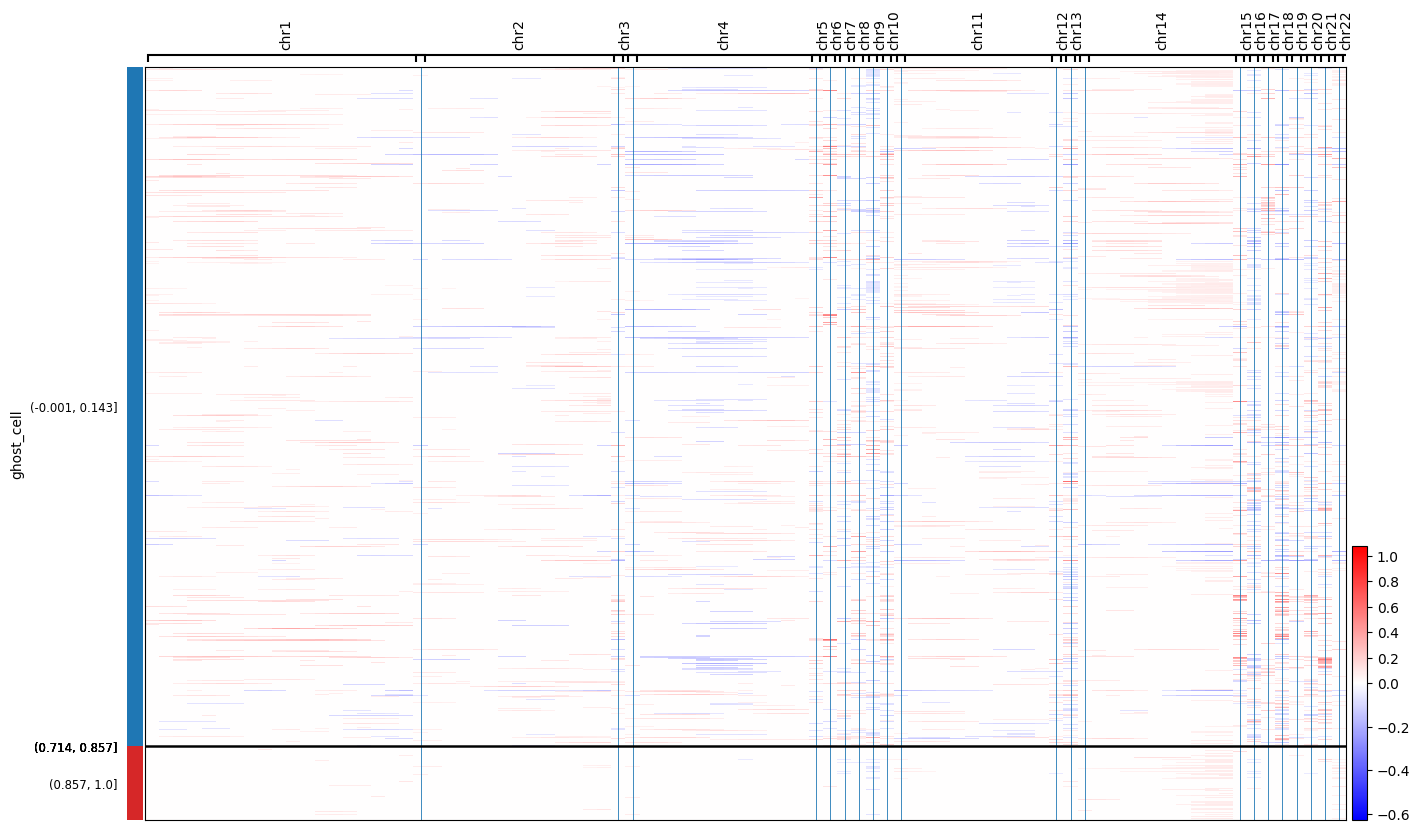

In [136]:
### CNV heatmap

# Load your merged AnnData object from PBMC and Tumor datasets
# Example: adata_combined2 = sc.read_h5ad("your_combined_file.h5ad")

import os
import urllib.request
import scanpy as sc
import pandas as pd
from infercnvpy import tl as cnv_tl, pl as cnv_pl
from anndata import read_h5ad

import matplotlib.pyplot as plt

# Load your merged AnnData object (PBMC + Tumor)
# adata_combined = sc.read_h5ad("your_combined_file.h5ad")  # Uncomment if loading from file

# Step 1: Download GTF file if not already present
gtf_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz"
gtf_filename = "gencode.v44.annotation.gtf.gz"
if not os.path.exists(gtf_filename):
    urllib.request.urlretrieve(gtf_url, gtf_filename)

# Step 2: Parse GTF and extract gene positions
gtf = read_gtf(gtf_filename).to_pandas()
genes = gtf[gtf["feature"] == "gene"]
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]
gene_pos = gene_pos.drop_duplicates(subset="gene").set_index("gene")

# Step 3: Merge GTF info with AnnData .var (gene metadata)
adata_combined.var["gene"] = adata_combined.var.index
intersecting_genes = pd.Index(adata_combined.var["gene"].unique()).intersection(gene_pos.index)

# Subset and align dataframes
filtered_var = adata_combined.var.loc[intersecting_genes].copy()
filtered_gene_pos = gene_pos.loc[intersecting_genes].copy()

# ✅ Drop overlapping columns to avoid join error
filtered_var = filtered_var.drop(columns=["chromosome", "start", "end"], errors="ignore")

# ✅ Perform safe join
merged_var = filtered_var.join(filtered_gene_pos)

# ✅ Reindex to match original .var shape
merged_var = merged_var.reindex(adata_combined.var_names)

# ✅ Assign merged var back
adata_combined.var = merged_var

# Step 4: Run CNV Inference using PBMC as reference
cnv_tl.infercnv(
    adata_combined,
    reference_key="source",
    reference_cat=["PBMC"],  # Normal cells
    window_size=100
)

# Step 5: Visualize CNV via chromosome heatmap grouped by ghost cell label
cnv_pl.chromosome_heatmap(
    adata_combined,
    groupby="ghost_cell"
)


In [137]:
###  CNV signal summary plotting code,
# Step 1: Add gene column for merging
adata_combined.var["gene"] = adata_combined.var.index

# Step 2: Find common genes between AnnData and GTF
intersecting_genes = pd.Index(adata_combined.var["gene"]).intersection(gene_pos.index)

# Step 3: Subset both var and gene_pos
filtered_var = adata_combined.var.loc[intersecting_genes].copy()
filtered_gene_pos = gene_pos.loc[intersecting_genes].copy()

# Step 4: Drop any overlapping columns from filtered_var
columns_to_drop = ["gene", "chromosome", "start", "end"]
filtered_var = filtered_var.drop(columns=[c for c in columns_to_drop if c in filtered_var.columns])

# Step 5: Safe join (indexes already aligned)
merged_var = filtered_var.join(filtered_gene_pos)

# Step 6: Reorder to match AnnData var_names
merged_var = merged_var.reindex(adata_combined.var_names)

# Step 7: Assign back to AnnData
adata_combined.var = merged_var


print(adata_combined.var.columns)




Index(['n_cells', 'mt', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'highly_variable',
       'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean',
       'std', 'chromosome', 'start', 'end'],
      dtype='object')


In [138]:

import matplotlib.pyplot as plt
import pandas as pd
# Step 1: Extract gene positions from GTF based on HGNC gene symbols
gtf = read_gtf(gtf_filename).to_pandas()
genes = gtf[gtf["feature"] == "gene"]

# Use 'gene_name' as index (matches adata_combined.var_names)
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]
gene_pos = gene_pos.drop_duplicates(subset="gene").set_index("gene")





INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


Unique chromosome values: ['chr1', NaN, 'chr2', 'chr3', 'chr4', ..., 'chr20', 'chr19', 'chrY', 'chr22', 'chr21']
Length: 25
Categories (25, object): ['chr1', 'chr2', 'chr3', 'chr4', ..., 'chr22', 'chrY', 'chrM', 'chrX']
Genes with valid chromosome: 1866


<Figure size 1400x500 with 0 Axes>

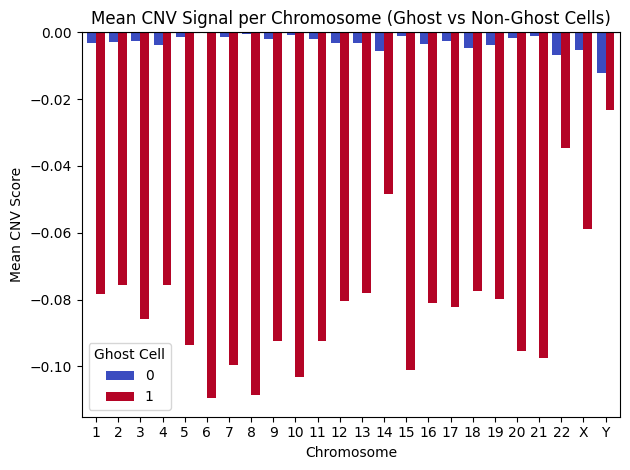

In [139]:
# Step 2: Prepare AnnData .var for merge
adata_combined.var["gene"] = adata_combined.var_names  # since var_names = gene symbols
intersecting_genes = pd.Index(adata_combined.var["gene"]).intersection(gene_pos.index)

# Subset .var and gene_pos
filtered_var = adata_combined.var.loc[intersecting_genes].copy()
filtered_gene_pos = gene_pos.loc[intersecting_genes].copy()

# Drop overlapping columns before join
filtered_var = filtered_var.drop(columns=["gene", "chromosome", "start", "end"], errors="ignore")

# Perform the join
merged_var = filtered_var.join(filtered_gene_pos)

# Reorder to match original var_names
merged_var = merged_var.reindex(adata_combined.var_names)

# Save back to AnnData
adata_combined.var = merged_var

print("Unique chromosome values:", adata_combined.var["chromosome"].unique())
print("Genes with valid chromosome:", adata_combined.var['chromosome'].notna().sum())

import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Clean chromosome names
adata_combined.var["chromosome"] = (
    adata_combined.var["chromosome"]
    .astype(str)
    .str.replace("chr", "", regex=False)
    .str.strip()
    .str.upper()
)

# Step 2: Keep only genes on valid chromosomes
valid_chroms = [str(i) for i in range(1, 23)] + ["X", "Y"]
adata_filtered = adata_combined[:, 
    adata_combined.var["chromosome"].isin(valid_chroms) &
    adata_combined.var["chromosome"].notna()
].copy()

# Step 3: Expression matrix (cells x genes)
cnv_df = pd.DataFrame(
    adata_filtered.X,
    index=adata_filtered.obs_names,
    columns=adata_filtered.var_names
)

# Step 4: Gene-to-chromosome map
gene_chr_map = adata_filtered.var["chromosome"].to_dict()

# Step 5: Compute per-chromosome average expression per cell
chrom_cnv = {}
for chrom in valid_chroms:
    genes = [g for g, c in gene_chr_map.items() if c == chrom]
    if genes:
        chrom_cnv[chrom] = cnv_df[genes].mean(axis=1)

chrom_cnv_df = pd.DataFrame(chrom_cnv)

# Step 6: Add ghost cell labels
chrom_cnv_df["ghost_cell"] = adata_filtered.obs["ghost_cell"].values

# Step 7: Compute group means
cnv_summary = chrom_cnv_df.groupby("ghost_cell").mean().T

# Step 8: Plot the result
plt.figure(figsize=(14, 5))
cnv_summary.plot(kind="bar", width=0.8, colormap="coolwarm")
plt.axhline(0, color="black", linestyle="--")
plt.title("Mean CNV Signal per Chromosome (Ghost vs Non-Ghost Cells)")
plt.ylabel("Mean CNV Score")
plt.xlabel("Chromosome")
plt.xticks(rotation=0)
plt.legend(title="Ghost Cell")
plt.tight_layout()
plt.show()



/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/876242929.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_cnv = chrom_cnv_df.groupby("leiden").mean()
/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/876242929.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/adi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


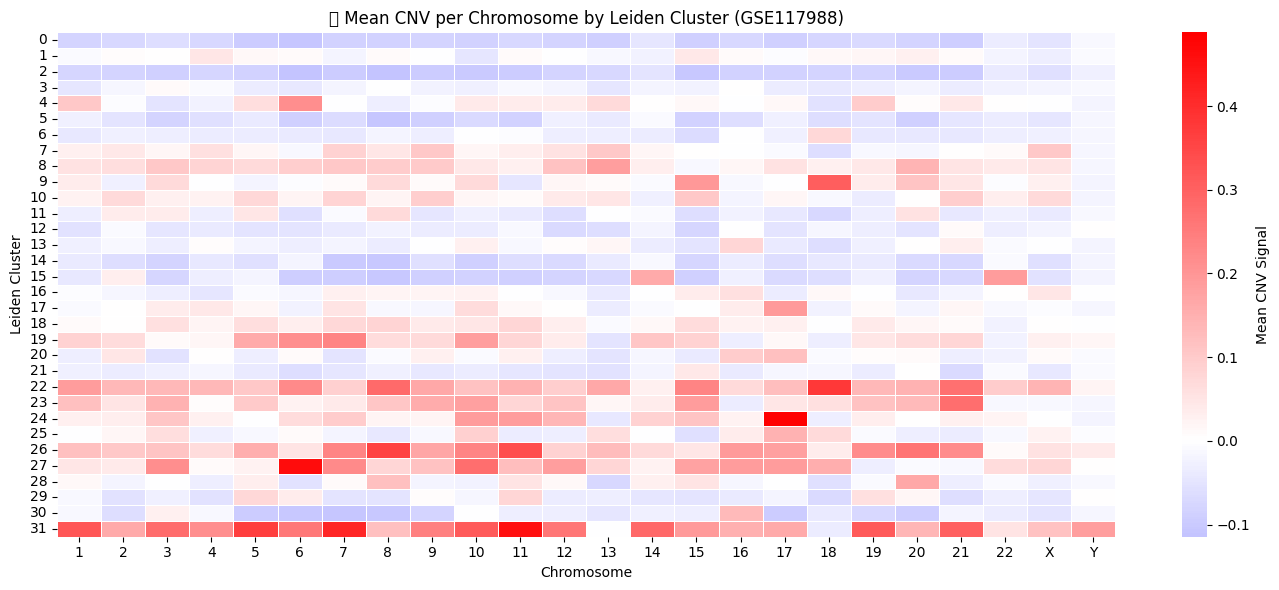

In [140]:
### Mean CNV per chromosome

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure chromosome formatting and filter to standard chromosomes
adata_combined.var["chromosome"] = (
    adata_combined.var["chromosome"]
    .astype(str)
    .str.replace("chr", "", regex=False)
    .str.strip()
    .str.upper()
)

valid_chroms = [str(i) for i in range(1, 23)] + ["X", "Y"]
adata_filtered = adata_combined[:, adata_combined.var["chromosome"].isin(valid_chroms)].copy()

# Step 2: Build gene → chromosome map
gene_chr_map = adata_filtered.var["chromosome"].to_dict()

# Step 3: Build CNV dataframe (cells × genes)
cnv_df = pd.DataFrame(
    adata_filtered.X,
    index=adata_filtered.obs_names,
    columns=adata_filtered.var_names
)

# Step 4: Compute per-cell mean CNV per chromosome
chrom_cnv = {}
for chrom in valid_chroms:
    genes = [g for g, c in gene_chr_map.items() if c == chrom]
    if genes:
        chrom_cnv[chrom] = cnv_df[genes].mean(axis=1)

chrom_cnv_df = pd.DataFrame(chrom_cnv)

# Step 5: Add Leiden cluster label
#chrom_cnv_df["leiden"] = adata_filtered.obs["leiden"].values
chrom_cnv_df["leiden"] = adata_combined.obs.loc[adata_filtered.obs_names, "leiden"].values


# Step 6: Group by Leiden cluster and compute average CNV per chromosome
cluster_cnv = chrom_cnv_df.groupby("leiden").mean()

# Step 7: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    cluster_cnv.astype(float),
    cmap="bwr", center=0,
    linewidths=0.5,
    annot=False,
    cbar_kws={"label": "Mean CNV Signal"}
)
plt.title("📊 Mean CNV per Chromosome by Leiden Cluster (GSE117988)")
plt.ylabel("Leiden Cluster")
plt.xlabel("Chromosome")
plt.tight_layout()
plt.show()


In [172]:
import pandas as pd

# Step 1: Ensure chromosome column is clean and standardized
adata_combined.var["chromosome"] = (
    adata_combined.var["chromosome"]
    .astype(str)
    .str.replace("chr", "", regex=False)
    .str.strip()
    .str.upper()
)

# Step 2: Define high-CNV chromosomes based on heatmap observation
selected_chroms = ["5", "6", "7", "8", "9", "10", "13", "14", "17", "18", "20", "22", "X"]

# Step 3: Filter for genes on selected chromosomes
cnv_genes = adata_combined.var[adata_combined.var["chromosome"].isin(selected_chroms)]

# Step 4: Organize genes by chromosome
genes_by_chr = {
    chrom: cnv_genes[cnv_genes["chromosome"] == chrom].index.tolist()
    for chrom in selected_chroms
}

# Step 5: Flatten into a DataFrame
flat_gene_list = [
    {"chromosome": chrom, "gene": gene}
    for chrom, genes in genes_by_chr.items()
    for gene in genes
]
genes_df = pd.DataFrame(flat_gene_list)

# Step 6: Display or export
genes_df.head(20)  # show top 20


KeyError: 'chromosome'

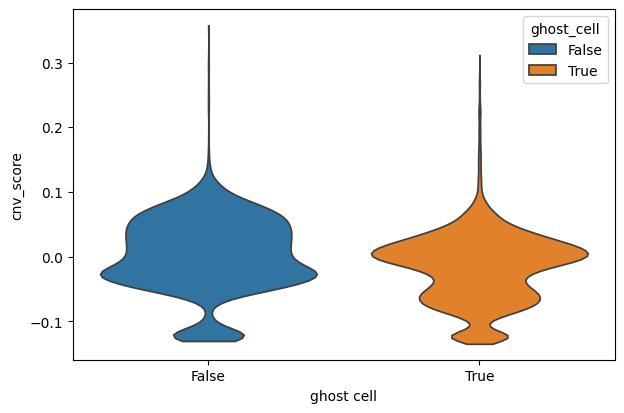

In [64]:
adata_combined.obs["ghost_cell"] = adata_combined.obs["ghost_cell"].astype("category")

adata_combined.obs["cnv_score"] = adata_combined.X.mean(axis=1)

# Violin plot comparing CNV scores between ghost and non-ghost cells
sc.pl.violin(adata_combined, keys="cnv_score", groupby="ghost_cell", stripplot=False)



In [1]:
pip install ikarus


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade ikarus


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [42]:
/Desktop/ikarus_signatures.gmt


NameError: name 'Desktop' is not defined

In [39]:
import scanpy as sc
import ikarus

from ikarus.classifier import Ikarus

from ikarus.data import get_default_signatures
import tempfile

# Get path to default gene signature file
signature_file = get_default_signatures()

# Create a temporary directory for output
out_dir = tempfile.mkdtemp()

# Initialize the classifier
ikarus_model = Ikarus(signatures_gmt=signature_file, out_dir=out_dir)

# Run prediction
ikarus_model.predict(adata_tumor)

# View predictions
print(adata_tumor.obs['ikarus_pred'].value_counts())


ImportError: cannot import name 'get_default_signatures' from 'ikarus.data' (/Users/adi/Library/Python/3.9/lib/python/site-packages/ikarus/data.py)

## Dataset GSE180286

In [3]:
import os
import tarfile
import gzip
download_url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE180nnn/GSE180286/suppl/GSE180286_RAW.tar"
raw_dir = os.path.expanduser("~/Desktop/Capstone/Raw Data")
tar_path = os.path.join(raw_dir, "GSE180286_RAW.tar")

# Step 1: Download the file
import urllib.request
if not os.path.exists(tar_path):
    print("Downloading...")
    urllib.request.urlretrieve(download_url, tar_path)
    print("Download completed.")
else:
    print("File already exists.")

extracted_dir = os.path.join(raw_dir, "GSE180286_EXTRACTED")
os.makedirs(extracted_dir, exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    tar.extractall(path=extracted_dir)
    print("Extraction complete.")
files = sorted([f for f in os.listdir(extracted_dir) if f.endswith(".txt.gz")])
print("Available files:", files[:5])  # Show a few

# Choose one file
expr_file = os.path.join(extracted_dir, files[0])
print(f"Loading file: {expr_file}")
with gzip.open(expr_file, 'rt') as f:
    df = pd.read_csv(f, sep="\t", index_col=0)

adata = sc.AnnData(df.T)
adata.var_names_make_unique()

# Step 6: Compute ghost cell metrics
mt_genes = [g for g in adata.var_names if g.upper().startswith("MT-")]
adata.obs["total_counts"] = adata.X.sum(axis=1)
adata.obs["pct_counts_mt"] = (
    adata[:, mt_genes].X.sum(axis=1) / adata.obs["total_counts"] * 100
    if mt_genes else np.zeros(adata.n_obs)
)

# Step 7: Define ghost cells
adata.obs["ghost_cell"] = (adata.obs["total_counts"] < 1500) | (adata.obs["pct_counts_mt"] > 10)

# Step 8: Summarize ghosting
summary = adata.obs["ghost_cell"].value_counts().rename({True: "Ghost", False: "Non-Ghost"})
print("\n🧬 Ghost Cell Summary:")
print(summary)

counts = adata.obs['ghost_cell'].value_counts()
total = counts.sum()

# Step 2: Compute percentages
percentages = (counts / total * 100).rename({True: "Ghost", False: "Non-Ghost"})

# Step 3: Display
print("📊 Ghost Cell Percentages:")
print(percentages)

File already exists.
Extraction complete.
Available files: ['GSM5457199_A2019-1.expression_matrix.txt.gz', 'GSM5457200_A2019-2.expression_matrix.txt.gz', 'GSM5457201_A2019-3.expression_matrix.txt.gz', 'GSM5457202_B2019-1.expression_matrix.txt.gz', 'GSM5457203_B2019-2.expression_matrix.txt.gz']
Loading file: /Users/adi/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457199_A2019-1.expression_matrix.txt.gz


NameError: name 'pd' is not defined

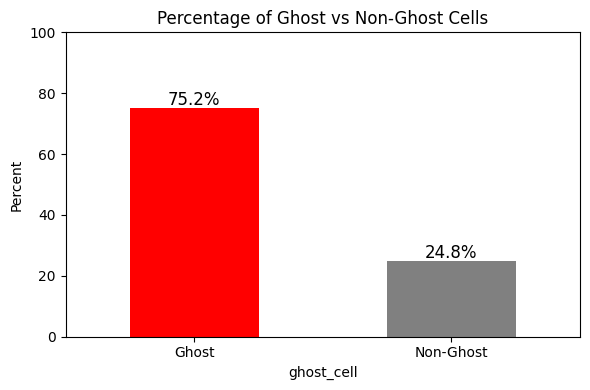

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
percentages.plot(kind='bar', color=['red', 'gray'])
plt.title("Percentage of Ghost vs Non-Ghost Cells")
plt.ylabel("Percent")
plt.xticks(rotation=0)
plt.ylim(0, 100)
for idx, val in enumerate(percentages):
    plt.text(idx, val + 1, f"{val:.1f}%", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import scanpy as sc

pbmc_path2 = os.path.expanduser("~/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457203_B2019-2.expression_matrix.txt.gz")
tumor_path2 = os.path.expanduser("~/Desktop/Capstone/Raw Data/GSE180286_EXTRACTED/GSM5457199_A2019-1.expression_matrix.txt.gz")

# Load and transpose PBMC matrix
with gzip.open(pbmc_path2, 'rt') as f:
    df_pbmc2 = pd.read_csv(f, sep='\t', index_col=0)
adata_pbmc2 = sc.AnnData(df_pbmc2.T)
adata_pbmc2.var_names_make_unique()

# Load and transpose Tumor matrix
with gzip.open(tumor_path2, 'rt') as f:
    df_tumor2 = pd.read_csv(f, sep='\t', index_col=0)
adata_tumor2 = sc.AnnData(df_tumor2.T)
adata_tumor2.var_names_make_unique()

# Annotate mitochondrial genes

# Thresholds for ghosting
ghost_threshold = 1500
mito_threshold = 10 
# Compute QC metrics to get mitochondrial percentages
MT_GENES = [
    'MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3',
    'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4',
    'MT-ND4L', 'MT-ND5', 'MT-ND6'
]

# Annotate mitochondrial genes
adata_pbmc2.var['mt'] = adata_pbmc2.var_names.isin(MT_GENES)
adata_tumor2.var['mt'] = adata_tumor2.var_names.isin(MT_GENES)

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata_pbmc2, qc_vars=['mt'], inplace=True)
sc.pp.calculate_qc_metrics(adata_tumor2, qc_vars=['mt'], inplace=True)

# Define ghost cells
adata_pbmc2.obs['ghost_cell'] = (
    (adata_pbmc2.obs['total_counts'] < ghost_threshold) |
    (adata_pbmc2.obs['pct_counts_mt'] > mito_threshold)
)

adata_tumor2.obs['ghost_cell'] = (
    (adata_tumor2.obs['total_counts'] < ghost_threshold) &
    (adata_tumor2.obs['pct_counts_mt'] > mito_threshold)
)

# Add source labels
adata_pbmc2.obs['source'] = 'PBMC'
adata_tumor2.obs['source'] = 'Tumor'

# Combine and summarize
combined_obs2 = pd.concat([
    adata_pbmc2.obs[['source', 'ghost_cell']],
    adata_tumor2.obs[['source', 'ghost_cell']]
])

ghost_summary2 = (
    combined_obs2
    .groupby('source')['ghost_cell']
    .agg(['sum', 'count'])
    .assign(ghost_pct=lambda x: 100 * x['sum'] / x['count'])
)

# Output
print("📊 Ghost Cell Summary (PBMC2 vs Tumor2):")
print(ghost_summary2)


📊 Ghost Cell Summary (PBMC2 vs Tumor2):
          sum  count  ghost_pct
source                         
PBMC    10527  11356  92.699894
Tumor     120   3267   3.673095


In [30]:
ghost_threshold = 1500
mito_threshold = 10 
# Compute QC metrics to get mitochondrial percentages
MT_GENES = [
    'MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3',
    'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4',
    'MT-ND4L', 'MT-ND5', 'MT-ND6'
]

# Annotate mitochondrial genes
adata_pbmc2.var['mt'] = adata_pbmc2.var_names.isin(MT_GENES)
adata_tumor2.var['mt'] = adata_tumor2.var_names.isin(MT_GENES)

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata_pbmc2, qc_vars=['mt'], inplace=True)
sc.pp.calculate_qc_metrics(adata_tumor2, qc_vars=['mt'], inplace=True)

# Define ghost cells
adata_pbmc2.obs['ghost_cell'] = (
    (adata_pbmc2.obs['total_counts'] < ghost_threshold) |
    (adata_pbmc2.obs['pct_counts_mt'] > mito_threshold)
)

adata_tumor2.obs['ghost_cell'] = (
    (adata_tumor2.obs['total_counts'] < ghost_threshold) |
    (adata_tumor2.obs['pct_counts_mt'] > mito_threshold)
)

# Add source labels
adata_pbmc2.obs['source'] = 'PBMC'
adata_tumor2.obs['source'] = 'Tumor'

# Combine and summarize
combined_obs2 = pd.concat([
    adata_pbmc2.obs[['source', 'ghost_cell']],
    adata_tumor2.obs[['source', 'ghost_cell']]
])

ghost_summary2 = (
    combined_obs2
    .groupby('source')['ghost_cell']
    .agg(['sum', 'count'])
    .assign(ghost_pct2=lambda x: 100 * x['sum'] / x['count'])
)

# Output
print("📊 Ghost Cell Summary (PBMC2 vs Tumor2):")
print(ghost_summary2)




📊 Ghost Cell Summary (PBMC2 vs Tumor2):
          sum  count  ghost_pct2
source                          
PBMC    10527  11356   92.699894
Tumor    2125   3267   65.044383


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_964/2729103123.py:5: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined2 = adata_pbmc2.concatenate(
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adi/Library/Python/3.9/lib/python/site-packages/pandas/core/util/hashing.py:330: RuntimeWarning: invalid value encountered in cast
  vals.astype(str).astype(object), hash_key, encoding
/Users/adi/L

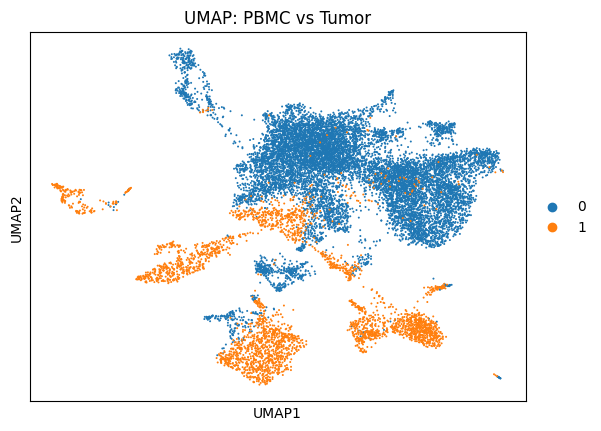

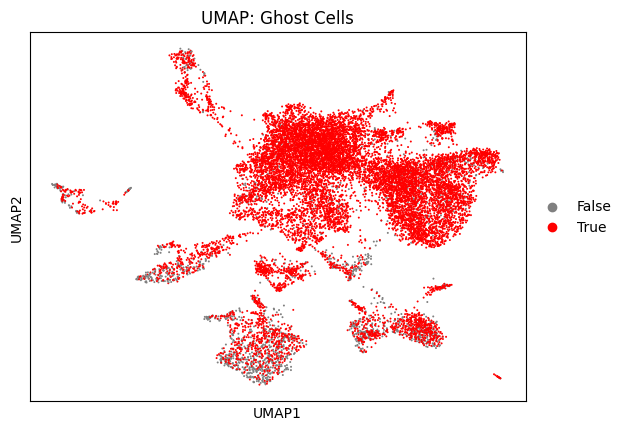

In [31]:
adata_pbmc2.obs['source'] = 'PBMC'
adata_tumor2.obs['source'] = 'Tumor'

# Use the same gene space (intersection)
adata_combined2 = adata_pbmc2.concatenate(
    adata_tumor2,
    batch_key="source",    # keeps track of PBMC vs Tumor
    index_unique=None,
    join="inner"           # intersect genes
)

sc.pp.normalize_total(adata_combined2, target_sum=1e4)
sc.pp.log1p(adata_combined2)
sc.pp.highly_variable_genes(adata_combined2, n_top_genes=2000, subset=True)
sc.pp.scale(adata_combined2, max_value=10)
sc.tl.pca(adata_combined2, svd_solver='arpack')
sc.pp.neighbors(adata_combined2, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_combined2)

sc.pl.umap(adata_combined2, color='source', title='UMAP: PBMC vs Tumor')
sc.pl.umap(adata_combined2, color='ghost_cell', title='UMAP: Ghost Cells', palette=['gray', 'red'])


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# STEP 4: Extract top 50 genes from DE results (group 1 = ghost cells)
de_genes_raw = adata_tumor2.uns['rank_genes_groups']['names']['1']
top_50_raw = list(de_genes_raw[:50])

# STEP 5: Filter to valid and non-zero expression genes
valid_genes = []
for g in top_50_raw:
    if g in adata_tumor2.var_names:
        expr = adata_tumor2[:, g].X
        # If sparse matrix, check for nonzero
        if hasattr(expr, "toarray"):
            if np.sum(expr.toarray()) > 0:
                valid_genes.append(g)
        else:
            if np.sum(expr) > 0:
                valid_genes.append(g)

print(f"✅ Using {len(valid_genes)} genes after filtering.")

# STEP 6: Prepare matrix
X = adata_tumor2[:, valid_genes].X
y = adata_tumor2.obs['ghost_cell'].astype(int).values

if hasattr(X, "toarray"):
    X = X.toarray()

# STEP 7: Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Train model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# STEP 9: SHAP analysis
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)[1]  # Class 1 = ghost

# STEP 10: Build SHAP DataFrame
assert shap_values.shape[1] == len(valid_genes), "Mismatch after filtering"

shap_df = pd.DataFrame({
    "gene": valid_genes,
    "shap_value": np.abs(shap_values).mean(axis=0)
}).sort_values("shap_value", ascending=False)

shap.summary_plot(shap_values, X_test, feature_names=valid_genes, plot_type="bar")







KeyError: 'rank_genes_groups'

## Dataset GSE114725

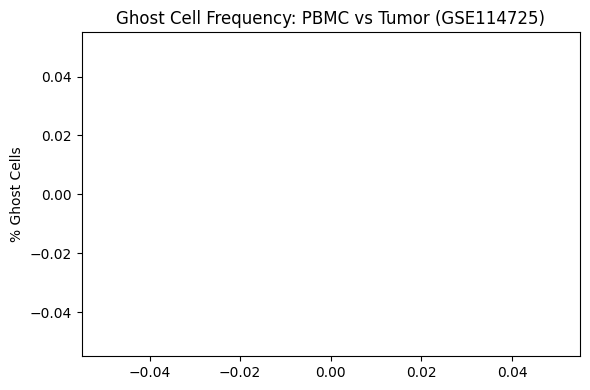

In [92]:
import tarfile
import gzip

# STEP 1: Define paths (update as needed)
tar_path = os.path.expanduser("~/Desktop/Capstone/Raw data/GSE114725_RAW.tar")
extract_dir = os.path.expanduser("~/Desktop/Capstone/Raw data/GSE114725_RAW")
os.makedirs(extract_dir, exist_ok=True)

# STEP 2: Extract only BLOOD and TUMOR files
with tarfile.open(tar_path, "r") as tar:
    members = [m for m in tar.getmembers() if ('BLOOD' in m.name or 'TUMOR' in m.name) and m.name.endswith('.csv.gz')]
    tar.extractall(path=extract_dir, members=members)

# ✅ STEP 3: Fixed function to load and label ghost cells
def load_expr_matrix(file_path, label):
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f, index_col=0)

    df = df.T  # Cells as rows

    # Drop non-numeric columns completely
    df_clean = df.apply(pd.to_numeric, errors='coerce')

    # Drop columns with any non-numeric values or NaNs
    df_clean = df_clean.loc[:, df_clean.dtypes == np.float64]
    df_clean = df_clean.dropna(axis=1, how='any')  # Remove columns with NaNs
    df_clean = df_clean.dropna(axis=0, how='all')  # Drop empty rows

    # Now safely compute totals
    df_clean['source'] = label
    df_clean['total_counts'] = df_clean.sum(axis=1)

    # Find mitochondrial genes
    mt_genes = [g for g in df_clean.columns if isinstance(g, str) and g.upper().startswith('MT-')]
    if mt_genes:
        df_clean['percent_mt'] = df_clean[mt_genes].sum(axis=1) / df_clean['total_counts'] * 100
    else:
        df_clean['percent_mt'] = 0

    # Ghost cell logic
    df_clean['is_ghost'] = ((df_clean['total_counts'] < 1500) | (df_clean['percent_mt'] > 10)).astype(int)

    return df_clean[['total_counts', 'percent_mt', 'is_ghost', 'source']]
# STEP 4: Process all PBMC and Tumor files
pbmc_data = []
tumor_data = []

for fname in os.listdir(extract_dir):
    fpath = os.path.join(extract_dir, fname)
    if "BLOOD" in fname:
        pbmc_data.append(load_expr_matrix(fpath, "PBMC"))
    elif "TUMOR" in fname:
        tumor_data.append(load_expr_matrix(fpath, "Tumor"))

pbmc_df = pd.concat(pbmc_data)
tumor_df = pd.concat(tumor_data)
combined_df = pd.concat([pbmc_df, tumor_df])

# STEP 5: Summarize ghost cell frequencies
ghost_summary = combined_df.groupby('source')['is_ghost'].mean().reset_index()
ghost_summary['ghost_percent'] = ghost_summary['is_ghost'] * 100

# STEP 6: Plot
plt.figure(figsize=(6, 4))
plt.bar(ghost_summary['source'], ghost_summary['ghost_percent'], color=['gray', 'red'])
plt.ylabel("% Ghost Cells")
plt.title("Ghost Cell Frequency: PBMC vs Tumor (GSE114725)")
plt.tight_layout()
plt.show()

## This is the beginning of SE176078 data from A single-cell and spatially

In [12]:
## This is the beginning of SE176078 data from A single-cell and spatially 
### resolved atlas of human breast cancers.
import os
from scipy.io import mmread
import pandas as pd
import scanpy as sc
extract_dir = os.path.expanduser("~/Desktop/Capstone/Raw Data/GSE176078/")

# 1. Load matrix and transpose
X = mmread(os.path.join(extract_dir, "count_matrix_sparse.mtx")).tocsr().T

# 2. Load genes
genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), sep="\t", header=None)
genes.columns = ["gene_id"]

# 3. Load barcodes
barcodes = pd.read_csv(os.path.join(extract_dir, "count_matrix_barcodes.tsv"), sep="\t", header=None)
barcodes.columns = ["cell_id"]

# 4. Load metadata
metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))

# 5. Build AnnData object
adata2 = sc.AnnData(X)

# Assign gene names (columns)
adata2.var_names = genes["gene_id"].astype(str).values
adata2.var_names_make_unique()

# Assign cell barcodes (rows)
adata2.obs_names = barcodes["cell_id"].astype(str).values

# Assign metadata
metadata.index = adata2.obs_names
adata2.obs = metadata

print(adata2)

AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major'


In [13]:
#meta_path = os.path.join(extract_dir, "metadata.csv")
#metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))
#metadata = pd.read_csv(meta_path)
#display(metadata.head())

#print("🔢 Unique patients:", metadata['patient_id'].nunique())
#print("🧬 Tumor subtypes:", metadata['subtype'].unique())

# Load expression matrix using Scanpy (10X format-compatible)
#adata2 = sc.read_10x_mtx(
    #extract_dir,
    #var_names="gene_symbols",  # Assumes gene symbols in `count_matrix_genes.tsv`
    #cache=True
#)

# Attach metadata
#adata2.obs = metadata.set_index(adata2.obs_names)

# Final check
#print(adata2)

extract_dir = "/Users/adi/Desktop/Capstone/Raw data/GSE176078"

# Load count matrix
X = mmread(os.path.join(extract_dir, "count_matrix_sparse.mtx")).T.tocsr()  # Transpose needed

# Load barcodes (cells)
barcodes = pd.read_csv(os.path.join(extract_dir, "count_matrix_barcodes.tsv"), header=None)[0].tolist()

# Load genes
#genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), header=None)
#gene_symbols = genes[1].tolist()

genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), header=None, sep="\t")
gene_symbols = genes[0].tolist()

# Create AnnData object
adata2 = sc.AnnData(X=X)
adata2.obs_names = barcodes
adata2.var_names = gene_symbols

# Load metadata
metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))
adata2.obs = metadata.set_index(adata2.obs_names)

# Final check
print(adata2)
print("🧬 Tumor subtypes:", adata2.obs['subtype'].unique())

AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major'
🧬 Tumor subtypes: ['HER2+' 'TNBC' 'ER+']


In [14]:
from scipy.io import mmread
mtx_path = os.path.join(extract_dir, "count_matrix_sparse.mtx")
X = mmread(os.path.join(extract_dir, "count_matrix_sparse.mtx")).tocsr().T

# Load genes
genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), sep="\t", header=None)
genes.columns = ["gene_id"]

# Load barcodes
barcodes = pd.read_csv(os.path.join(extract_dir, "count_matrix_barcodes.tsv"), sep="\t", header=None)
barcodes.columns = ["cell_id"]

# Load metadata
metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))

# Create AnnData
adata3 = sc.AnnData(X)

# Set .var_names using gene IDs
adata3.var_names = genes["gene_id"].astype(str).values
adata3.var_names_make_unique()

# Set .obs using barcodes and align metadata
adata3.obs_names = barcodes["cell_id"].astype(str).values
metadata.index = adata3.obs_names
adata3.obs = metadata

print(adata3)












AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major'


In [15]:
# Define ghost cells as those with low RNA counts or high mito percentage
adata3.obs['is_ghost'] = (
    (adata3.obs['nCount_RNA'] < 1000) | 
    (adata3.obs['percent.mito'] > 15)
).astype(int)

# Summary count
adata3.obs['is_ghost'].value_counts()

adata3.obs.groupby('orig.ident')['is_ghost'].mean()

orig.ident
CID3586     0.061994
CID3838     0.036124
CID3921     0.053241
CID3941     0.152139
CID3946     0.695090
CID3948     0.232058
CID3963     0.043663
CID4040     0.026472
CID4066     0.064419
CID4067     0.215462
CID4290A    0.228191
CID4398     0.092563
CID44041    0.023463
CID4461     0.589540
CID4463     0.116872
CID4465     0.668159
CID4471     0.055872
CID4495     0.062993
CID44971    0.042950
CID44991    0.177844
CID4513     0.020288
CID4515     0.048204
CID45171    0.069473
CID4523     0.100342
CID4530N    0.046496
CID4535     0.150467
Name: is_ghost, dtype: float64

In [16]:
#Ghost cell % by subtype
ghost_by_subtype = (
    adata3.obs
    .groupby('subtype')['is_ghost']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'ghost_cells', 'count': 'total_cells'})
)
ghost_by_subtype['ghost_percent'] = 100 * ghost_by_subtype['ghost_cells'] / ghost_by_subtype['total_cells']
ghost_by_subtype = ghost_by_subtype.sort_values('ghost_percent', ascending=False)

display(ghost_by_subtype)

ghost_cells  total_cells  ghost_percent
subtype                                         
ER+             5034        38241      13.163882
TNBC            4372        42512      10.284155
HER2+           1141        19311       5.908550

In [17]:
#Ghost cell % by celltype_major
ghost_by_celltype = (
    adata3.obs
    .groupby('celltype_major')['is_ghost']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'ghost_cells', 'count': 'total_cells'})
)
ghost_by_celltype['ghost_percent'] = 100 * ghost_by_celltype['ghost_cells'] / ghost_by_celltype['total_cells']
ghost_by_celltype = ghost_by_celltype.sort_values('ghost_percent', ascending=False)

display(ghost_by_celltype)

ghost_cells  total_cells  ghost_percent
celltype_major                                            
PVL                        802         5423      14.788862
Cancer Epithelial         3279        24489      13.389685
B-cells                    382         3206      11.915159
CAFs                       745         6573      11.334246
Endothelial                838         7605      11.019066
T-cells                   3143        35214       8.925427
Normal Epithelial          358         4355       8.220436
Myeloid                    792         9675       8.186047
Plasmablasts               208         3524       5.902384

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_1466/2355722101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghost_by_subtype.reset_index(), x='subtype', y='ghost_percent', palette='Set2')


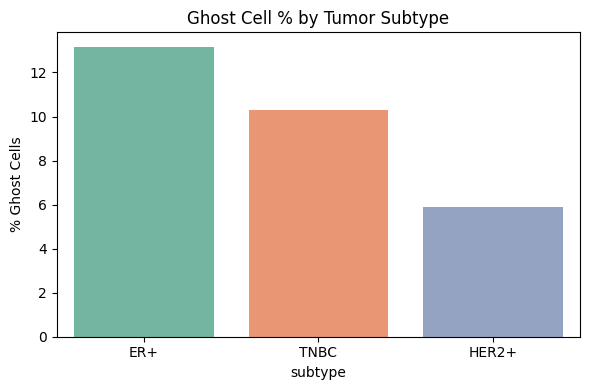

In [18]:
#Bar plot: % ghost cells by subtype
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(data=ghost_by_subtype.reset_index(), x='subtype', y='ghost_percent', palette='Set2')
plt.ylabel('% Ghost Cells')
plt.title('Ghost Cell % by Tumor Subtype')
plt.tight_layout()
plt.show()

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_1466/3357901534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ghost_by_celltype.reset_index(), x='celltype_major', y='ghost_percent', palette='Set3')


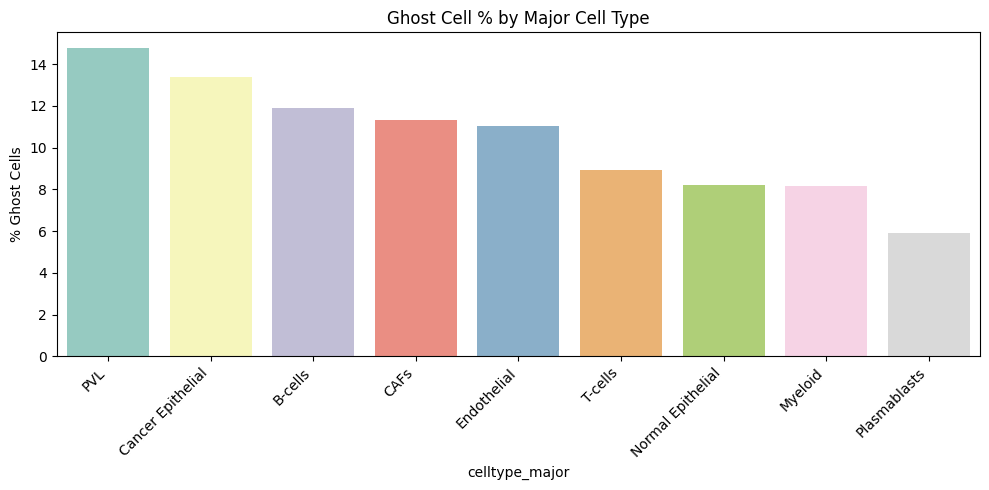

In [19]:
#Bar plot: % ghost cells by celltype_major
plt.figure(figsize=(10,5))
sns.barplot(data=ghost_by_celltype.reset_index(), x='celltype_major', y='ghost_percent', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Ghost Cells')
plt.title('Ghost Cell % by Major Cell Type')
plt.tight_layout()
plt.show()

In [21]:
#Goal: Do high-ghost patients show distinct cellular or functional signatures?
#STEP 1: Calculate % Ghost Cells Per Patient
ghost_by_patient = (
    adata3.obs
    .groupby('orig.ident')['is_ghost']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'ghost_cells', 'count': 'total_cells'})
)

ghost_by_patient['ghost_percent'] = 100 * ghost_by_patient['ghost_cells'] / ghost_by_patient['total_cells']
ghost_by_patient = ghost_by_patient.sort_values('ghost_percent', ascending=False)
display(ghost_by_patient)

ghost_cells  total_cells  ghost_percent
orig.ident                                         
CID3946             538          774      69.509044
CID4465            1045         1564      66.815857
CID4461             372          631      58.954041
CID3948             540         2327      23.205844
CID4290A           1321         5789      22.819140
CID4067             811         3764      21.546227
CID44991           1249         7023      17.784423
CID3941              96          631      15.213946
CID4535             596         3961      15.046705
CID4463             133         1138      11.687170
CID4523             176         1754      10.034208
CID4398             412         4451       9.256347
CID45171            170         2447       6.947282
CID4066             342         5309       6.441891
CID4495             503         7985       6.299311
CID3586             383         6178       6.199417
CID4471             481         8609       5.587176
CID3921             161         3024       5.324074
CID4515             200         4149       4.820439
CID4530N            205         4409       4.649580
CID3963             154         3527       4.366317
CID44971            343         7986       4.295016
CID3838              85         2353       3.612410
CID4040              67         2531       2.647175
CID44041             50         2131       2.346316
CID4513             114         5619       2.028831

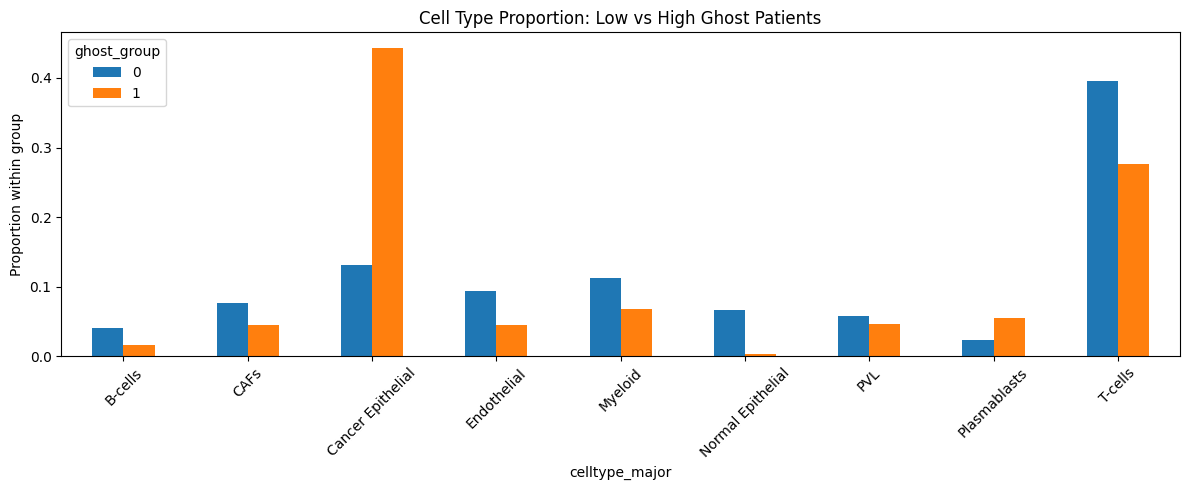

In [22]:
#STEP 2: Label Each Cell with Its Patient’s Ghost Burden
patient_ghost_map = ghost_by_patient['ghost_percent'].to_dict()
adata3.obs['patient_ghost_percent'] = adata3.obs['orig.ident'].map(patient_ghost_map)

# Optional binning: high vs low ghost patient
threshold = ghost_by_patient['ghost_percent'].median()
adata3.obs['ghost_group'] = (adata3.obs['patient_ghost_percent'] >= threshold).astype(int)  # 1 = high, 0 = low

#STEP 3: Check Cell Type Composition in High-Ghost vs Low-Ghost Patients
composition = (
    adata3.obs
    .groupby(['ghost_group', 'celltype_major'])
    .size()
    .unstack(fill_value=0)
    .T  # Transpose for easier comparison
)

# Normalize by total cells per group
composition_norm = composition.div(composition.sum(axis=0), axis=1)
composition_norm.plot(kind='bar', figsize=(12,5), title="Cell Type Proportion: Low vs High Ghost Patients")
plt.ylabel("Proportion within group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
adata3.obs['is_cancer'] = (adata3.obs['celltype_major'] == 'Cancer Epithelial').astype(int)
# Preprocessing
sc.pp.normalize_total(adata3, target_sum=1e4)
sc.pp.log1p(adata3)
sc.pp.highly_variable_genes(adata3, n_top_genes=1000)

# Subset to HVGs
adata_cancer = adata3[:, adata3.var.highly_variable]
X = adata_cancer.X.toarray()  # feature matrix
y = adata_cancer.obs['is_cancer'].values  # binary label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


/Users/adi/Library/Python/3.9/lib/python/site-packages/pandas/core/util/hashing.py:330: RuntimeWarning: invalid value encountered in cast
  vals.astype(str).astype(object), hash_key, encoding


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15047
           1       0.98      0.98      0.98      4966

    accuracy                           0.99     20013
   macro avg       0.99      0.99      0.99     20013
weighted avg       0.99      0.99      0.99     20013



In [23]:
from scipy.stats import chi2_contingency

# Build contingency table
contingency = pd.crosstab(adata3.obs['celltype_major'], adata3.obs['is_ghost'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-squared test p-value: {p:.5f}")

Chi-squared test p-value: 0.00000


In [24]:
pip install --upgrade anndata


Defaulting to user installation because normal site-packages is not writeable
  Using cached anndata-0.10.9-py3-none-any.whl (128 kB)
  Attempting uninstall: anndata
    Found existing installation: anndata 0.10.8
    Uninstalling anndata-0.10.8:
      Successfully uninstalled anndata-0.10.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scvi-tools 1.1.6.post2 requires anndata<=0.10.8,>=0.7.5, but you have anndata 0.10.9 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install scvi-tools --upgrade --force-reinstall


Defaulting to user installation because normal site-packages is not writeable
  Using cached scvi_tools-1.1.6.post2-py3-none-any.whl (387 kB)
  Using cached h5py-3.13.0-cp39-cp39-macosx_10_9_x86_64.whl (3.4 MB)
  Using cached pyro_ppl-1.9.1-py3-none-any.whl (755 kB)
     |████████████████████████████████| 4.5 MB 1.9 MB/s eta 0:00:01
  distutils: /private/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/pip-build-env-wk4t8b5w/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  distutils: /private/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/pip-build-env-wk4t8b5w/normal/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packages
  user = False
  home = None
  root = None
  prefix = '/private/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/pip-build-env-wk4t8b5w/normal'
  distutils: /private/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/pip-build-env-wk4t8b5w/overlay/lib/python3.9/site-packages
  sysconfig: /Library/Python/3.9/site-packa

In [29]:

import os
import pandas as pd
import scanpy as sc
import time
import tarfile
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from scvi.data import pbmc3k, breast_cancer

adata_pbmc = pbmc3k()
adata_pbmc.obs['source'] = 'PBMC'
adata_pbmc.obs['total_counts'] = adata_pbmc.X.sum(axis=1)
adata_pbmc.obs['ghost_cell'] = adata_pbmc.obs['total_counts'] < 1000

# Tumor dataset (breast cancer)
adata_tumor = breast_cancer()
adata_tumor.obs['source'] = 'Tumor'
adata_tumor.obs['total_counts'] = adata_tumor.X.sum(axis=1)
adata_tumor.obs['ghost_cell'] = adata_tumor.obs['total_counts'] < 1000

# Combine and summarize
df_comb = pd.concat([
    adata_pbmc.obs[['source', 'ghost_cell']],
    adata_tumor.obs[['source', 'ghost_cell']]
])

summary = (
    df_comb.groupby("source")["ghost_cell"]
    .agg(["sum", "count"])
    .assign(ghost_pct=lambda x: 100 * x["sum"] / x["count"])
)

print("✅ Ghost Cell Summary:")
print(summary)



ImportError: cannot import name 'pbmc3k' from 'scvi.data' (/Users/adi/Library/Python/3.9/lib/python/site-packages/scvi/data/__init__.py)

In [30]:
import pandas as pd
import scanpy as sc
import gzip
import os

base_path = os.path.expanduser("~/Desktop/Capstone/Raw data")
expr_path = os.path.join(base_path, "GSE146771_CRC.Leukocyte.10x.TPM.txt.gz")

# Load expression matrix
print("Loading TPM matrix...")
# Reload with header=None
with gzip.open(expr_path, "rt") as f:
    df_raw = pd.read_csv(f, sep="\t", header=None)

# First column is gene names, first row is cell IDs
genes = df_raw.iloc[1:, 0].values
cells = df_raw.iloc[0, 1:].values

# Extract expression values
df_expr = df_raw.iloc[1:, 1:].copy()
df_expr.columns = cells
df_expr.index = genes

# Convert to numeric
df_expr = df_expr.apply(pd.to_numeric, errors='coerce')
df_expr = df_expr.dropna(how="all")       # remove empty genes
df_expr = df_expr.dropna(axis=1, how="all")  # remove empty cells

# Transpose: cells x genes
df_expr = df_expr.T
df_expr.index.name = "cell_id"

print("Final shape (cells x genes):", df_expr.shape)



Loading TPM matrix...


FileNotFoundError: [Errno 2] No such file or directory: '/Users/adi/Desktop/Capstone/Raw data/GSE146771_CRC.Leukocyte.10x.TPM.txt.gz'

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

meta_path = os.path.join(base_path, "GSE146771_CRC.Leukocyte.10x.Metadata.txt.gz")

# Load metadata
df_meta = pd.read_csv(meta_path, sep="\t", index_col=0)

# Align and attach to AnnData
adata13.obs = df_meta.loc[adata13.obs_names]
print("Metadata columns:", adata13.obs.columns.tolist())





FileNotFoundError: [Errno 2] No such file or directory: '/Users/adi/Desktop/Capstone/Raw data/GSE146771_CRC.Leukocyte.10x.Metadata.txt.gz'

In [44]:
adata13.obs['total_TPM'] = adata13.X.sum(axis=1)

# Define ghost cells as cells with very low total TPM (< 1000)
ghost_threshold = 1000
adata13.obs['ghost_cell'] = adata13.obs['total_TPM'] < ghost_threshold

# Summary
print(adata13.obs['ghost_cell'].value_counts())
print(adata13.obs['total_TPM'].describe())


NameError: name 'adata13' is not defined

### GSE161529 dataset   

In [49]:
import os

extract_dir = os.path.expanduser("~/Desktop/Capstone/Raw data/GSE161529_RAW")
print(os.listdir(extract_dir))



['GSM4909305_ER-MH0029-7C-matrix.mtx.gz', 'GSM4909319_mER-PM0178-matrix.mtx.gz', 'GSM4909304_ER-MH0163-matrix.mtx.gz', 'GSM4909261_N-PM0230-Total-barcodes.tsv.gz', 'GSM4909275_N-PM0372-Epi-barcodes.tsv.gz', 'GSM4909302_ER-MH0025-matrix.mtx.gz', 'GSM4909258_N-NF-Epi-barcodes.tsv.gz', 'GSM4909314_ER-MH0064-LN-matrix.mtx.gz', 'GSM4909272_N-MH0021-Total-barcodes.tsv.gz', 'GSM4909286_TN-B1-MH0131-matrix.mtx.gz', 'GSM4909270_N-PM0342-Total-barcodes.tsv.gz', 'GSM4909309_ER-MH0043-T-matrix.mtx.gz', 'GSM4909289_HER2-AH0308-matrix.mtx.gz', 'GSM4909288_TN-B1-MH0177-barcodes.tsv.gz', 'GSM4909253_N-PM0092-Total-barcodes.tsv.gz', 'GSM4909315_ER-MH0167-T-barcodes.tsv.gz', 'GSM4909304_ER-MH0163-barcodes.tsv.gz', 'GSM4909278_B1-MH0033-barcodes.tsv.gz', 'GSM4909282_TN-MH0135-matrix.mtx.gz', 'GSM4909276_N-PM0372-Total-barcodes.tsv.gz', 'GSM4909310_ER-MH0043-LN-matrix.mtx.gz', 'GSM4909265_N-PM0233-Total-barcodes.tsv.gz', 'GSM4909264_N-N1B-Epi-barcodes.tsv.gz', 'GSM4909254_N-PM0019-Total-matrix.mtx.gz', 'G

In [55]:
features_file = os.path.expanduser("~/Desktop/Capstone/Raw data/GSE161529_features.tsv.gz")

# Load gene names
with gzip.open(features_file, 'rt') as f:
    features = pd.read_csv(f, sep="\t", header=None)
    gene_names = features[1].astype(str).tolist()  # column 1 is gene name

In [59]:
import os
import pandas as pd
import scanpy as sc
from scipy.io import mmread
import gzip
from tqdm import tqdm  # optional progress bar

# Set paths
extract_dir = os.path.expanduser("~/Desktop/Capstone/Raw data/GSE161529_RAW")
features_file = os.path.join(raw_dir, "GSE161529_features.tsv.gz")

# Load gene names (shared across samples)
with gzip.open(features_file, 'rt') as f:
    features = pd.read_csv(f, sep="\t", header=None)
    gene_names = features[1].astype(str)

# Initialize list to collect AnnData objects
adatas = []

# Find all matrix files
matrix_files = sorted([f for f in os.listdir(raw_dir) if f.endswith("-matrix.mtx.gz")])

# Loop through each matrix file
for matrix_file in tqdm(matrix_files, desc="Loading samples"):
    sample_id = matrix_file.replace("-matrix.mtx.gz", "")
    barcode_file = f"{sample_id}-barcodes.tsv.gz"

    matrix_path = os.path.join(raw_dir, matrix_file)
    barcode_path = os.path.join(raw_dir, barcode_file)

    
        # Load expression matrix
    with gzip.open(matrix_path, 'rt') as f:
            X = mmread(f).T.tocsr()

        # Load barcodes
    with gzip.open(barcode_path, 'rt') as f:
            barcodes = pd.read_csv(f, header=None)[0].astype(str)

        # Build AnnData
    adata = sc.AnnData(X)
    adata.var_names = gene_names[:X.shape[1]]
    adata.obs_names = barcodes
    adata.var_names_make_unique()
    adata.obs['sample_id'] = sample_id

    adatas.append(adata)

# Concatenate all samples
adata_all = adatas[0].concatenate(adatas[1:], batch_key="batch", batch_categories=[a.obs['sample_id'][0] for a in adatas])
print(adata_all)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/adi/Desktop/Capstone/Raw Data/GSE161529_RAW/GSE161529_features.tsv.gz'

In [ ]:
from scipy.io import mmread
import pandas as pd
import scanpy as sc

# Example loading
X = mmread("matrix.mtx").T.tocsr()
genes = pd.read_csv("features.tsv", sep="\t", header=None)
barcodes = pd.read_csv("barcodes.tsv", sep="\t", header=None)

adata = sc.AnnData(X=X)
adata.var_names = genes[1] if genes.shape[1] > 1 else genes[0]
adata.obs_names = barcodes[0]

## GSE161529 Dataset

In [4]:
import os
import tarfile

# Update to your correct local path
tar_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW.tar")
extract_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")

# Create the output directory if not already there
os.makedirs(extract_path, exist_ok=True)

# Extract TAR contents
with tarfile.open(tar_path, "r") as tar:
    tar.extractall(path=extract_path)

# Check contents
print("Extracted files:")
print(os.listdir(extract_path)[:10])

Extracted files:
['GSM4909305_ER-MH0029-7C-matrix.mtx.gz', 'GSM4909319_mER-PM0178-matrix.mtx.gz', 'GSM4909304_ER-MH0163-matrix.mtx.gz', 'GSM4909261_N-PM0230-Total-barcodes.tsv.gz', 'GSM4909275_N-PM0372-Epi-barcodes.tsv.gz', 'GSM4909302_ER-MH0025-matrix.mtx.gz', 'GSM4909258_N-NF-Epi-barcodes.tsv.gz', 'GSM4909314_ER-MH0064-LN-matrix.mtx.gz', 'GSM4909272_N-MH0021-Total-barcodes.tsv.gz', 'GSM4909286_TN-B1-MH0131-matrix.mtx.gz']


In [5]:
import scanpy as sc
import os

# Define paths
data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/")
sample_prefix = "GSM4909305_ER-MH0029-7C"

raw_data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")
for f in sorted(os.listdir(raw_data_dir)):
    print(f)

GSM4909253_N-PM0092-Total-barcodes.tsv.gz
GSM4909253_N-PM0092-Total-matrix.mtx.gz
GSM4909254_N-PM0019-Total-barcodes.tsv.gz
GSM4909254_N-PM0019-Total-matrix.mtx.gz
GSM4909255_N-N280-Epi-barcodes.tsv.gz
GSM4909255_N-N280-Epi-matrix.mtx.gz
GSM4909256_N-PM0095-Epi-barcodes.tsv.gz
GSM4909256_N-PM0095-Epi-matrix.mtx.gz
GSM4909257_N-PM0095-Total-barcodes.tsv.gz
GSM4909257_N-PM0095-Total-matrix.mtx.gz
GSM4909258_N-NF-Epi-barcodes.tsv.gz
GSM4909258_N-NF-Epi-matrix.mtx.gz
GSM4909259_N-NE-Epi-barcodes.tsv.gz
GSM4909259_N-NE-Epi-matrix.mtx.gz
GSM4909260_N-N1105-Epi-barcodes.tsv.gz
GSM4909260_N-N1105-Epi-matrix.mtx.gz
GSM4909261_N-PM0230-Total-barcodes.tsv.gz
GSM4909261_N-PM0230-Total-matrix.mtx.gz
GSM4909262_N-MH0064-Epi-barcodes.tsv.gz
GSM4909262_N-MH0064-Epi-matrix.mtx.gz
GSM4909263_N-MH0064-Total-barcodes.tsv.gz
GSM4909263_N-MH0064-Total-matrix.mtx.gz
GSM4909264_N-N1B-Epi-barcodes.tsv.gz
GSM4909264_N-N1B-Epi-matrix.mtx.gz
GSM4909265_N-PM0233-Total-barcodes.tsv.gz
GSM4909265_N-PM0233-Total-matr

In [6]:
import scanpy as sc
import pandas as pd
import os

def load_sample(sample_prefix, data_dir, features_path):
    """
    Load a single sample (matrix + barcodes) from GSE161529 into an AnnData object.
    
    sample_prefix: e.g., "GSM4909253_N-PM0092-Total"
    data_dir: folder where .mtx and .barcodes files are
    features_path: path to the shared GSE161529_features.tsv.gz file
    """
    matrix_fp = os.path.join(data_dir, f"{sample_prefix}-matrix.mtx.gz")
    barcodes_fp = os.path.join(data_dir, f"{sample_prefix}-barcodes.tsv.gz")
    
    # Load matrix (cells x genes)
    adata = sc.read_mtx(matrix_fp).T  # transpose to genes x cells
    
    # Load features and barcodes
    features = pd.read_csv(features_path, sep="\t", header=None)
    barcodes = pd.read_csv(barcodes_fp, header=None)
    
    # Set names
    adata.var_names = features[0].astype(str)
    adata.obs_names = barcodes[0].astype(str)
    adata.var_names_make_unique()
    
    # Store sample name
    adata.obs["sample"] = sample_prefix
    
    return adata

data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")
features_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_features.tsv.gz")
sample_id = "GSM4909253_N-PM0092-Total"

adata_test = load_sample(sample_id, data_dir, features_path)
print(f"Loaded: {adata_test.n_obs} cells × {adata_test.n_vars} genes")


Loaded: 4966 cells × 33538 genes


In [7]:
# Total UMI counts per cell
adata_test.obs['total_counts'] = adata_test.X.sum(axis=1)

# Percentage of mitochondrial reads
# First, annotate mitochondrial genes
adata_test.var['mt'] = adata_test.var_names.str.upper().str.startswith('MT-')

# Compute % mitochondrial counts
sc.pp.calculate_qc_metrics(adata_test, qc_vars=['mt'], inplace=True)

# Define ghost cells: low total RNA OR high mitochondrial %
ghost_threshold = 1500
mito_threshold = 10  # adjust based on dataset if needed
adata_test.obs['ghost_cell'] = (
    (adata_test.obs['total_counts'] < ghost_threshold) |
    (adata_test.obs['pct_counts_mt'] > mito_threshold)
).astype(int)

# Summary
print("📊 Ghost Cell Count:")
print(adata_test.obs['ghost_cell'].value_counts())


📊 Ghost Cell Count:
ghost_cell
0    4126
1     840
Name: count, dtype: int64


In [8]:
import os

raw_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")
# samples = sorted(set(f.split("-")[0] for f in os.listdir(raw_dir) if f.endswith("matrix.mtx.gz")))
# print(f"Found {len(samples)} samples")
samples = sorted(set(f.replace("-matrix.mtx.gz", "") for f in os.listdir(raw_dir) if f.endswith("matrix.mtx.gz")))
print(f"Found {len(samples)} samples")



Found 69 samples


In [9]:
import scanpy as sc
import shutil
import gzip

def load_sample(sample_prefix, raw_dir, features_path):
    temp_dir = os.path.join(raw_dir, "temp")
    os.makedirs(temp_dir, exist_ok=True)

    # Rename all expected files for Scanpy format
    shutil.copy(os.path.join(raw_dir, f"{sample_prefix}-matrix.mtx.gz"), os.path.join(temp_dir, "matrix.mtx.gz"))
    shutil.copy(os.path.join(raw_dir, f"{sample_prefix}-barcodes.tsv.gz"), os.path.join(temp_dir, "barcodes.tsv.gz"))
    shutil.copy(features_path, os.path.join(temp_dir, "features.tsv.gz"))

    # Load into AnnData
    adata = sc.read_10x_mtx(temp_dir, var_names="gene_symbols", cache=False)
    adata.obs["sample"] = sample_prefix  # tag sample name

    # Clean up
    shutil.rmtree(temp_dir)
    return adata


In [10]:
all_adata = []
for sample in samples:
    try:
        ad = load_sample(sample, raw_dir, features_path)
        all_adata.append(ad)
    except Exception as e:
        print(f"Failed to load {sample}: {e}")

#adata_combined = all_adata[0].concatenate(all_adata[1:], batch_key="sample_id")
import anndata as ad

adata_combined2 = ad.concat(all_adata, label="sample_id", keys=[a.obs["sample"][0] for a in all_adata])



/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_14838/2843483713.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata_combined2 = ad.concat(all_adata, label="sample_id", keys=[a.obs["sample"][0] for a in all_adata])
/Users/adi/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
adata_combined2.obs_names_make_unique()

sc.pp.filter_cells(adata_combined2, min_genes=200)
sc.pp.filter_genes(adata_combined2, min_cells=3)



In [14]:
important_breast_cancer_proto_oncogenes = [
    # Genes provided by the user
    'JUN',      # Component of AP-1 transcription factor
    'FOS',      # Component of AP-1 transcription factor
    'MYC',      # Transcription factor, central to cell growth/proliferation
    'H19',      # Long non-coding RNA (lncRNA) acting as an oncogene
    'PELP1',    # Scaffolding protein, co-regulator for nuclear receptors

    # Additional important proto-oncogenes in breast cancer
    'HER2',     # Also known as ERBB2, receptor tyrosine kinase, amplified in HER2+ breast cancer
    'RAS',      # General family of small GTPases (includes KRAS, HRAS, NRAS)
    'EGFR',     # Also known as ERBB1, epidermal growth factor receptor
    'AKT1',     # Serine/threonine kinase in PI3K/AKT pathway
    'MDM2',     # E3 ubiquitin ligase, targets p53 for degradation
    'CCND1',    # Cyclin D1, cell cycle regulator
    'FGFR1',    # Fibroblast Growth Factor Receptor 1
    'FGFR2',    # Fibroblast Growth Factor Receptor 2
    'FGFR3',    # Fibroblast Growth Factor Receptor 3
    'FGFR4',    # Fibroblast Growth Factor Receptor 4
    'SRC',      # Proto-oncogene tyrosine-protein kinase Src
    'BCL2',     # Anti-apoptotic gene
    'ESR1',     # Estrogen Receptor 1, can act as a proto-oncogene when dysregulated
    'MET',      # Receptor tyrosine kinase
    'PIK3CA'    # Phosphatidylinositol 3-kinase catalytic subunit alpha
]

# You can print the list to see all the genes
print(important_breast_cancer_proto_oncogenes)

['JUN', 'FOS', 'MYC', 'H19', 'PELP1', 'HER2', 'RAS', 'EGFR', 'AKT1', 'MDM2', 'CCND1', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'SRC', 'BCL2', 'ESR1', 'MET', 'PIK3CA']


Missing genes: ['H19', 'HER2', 'RAS']


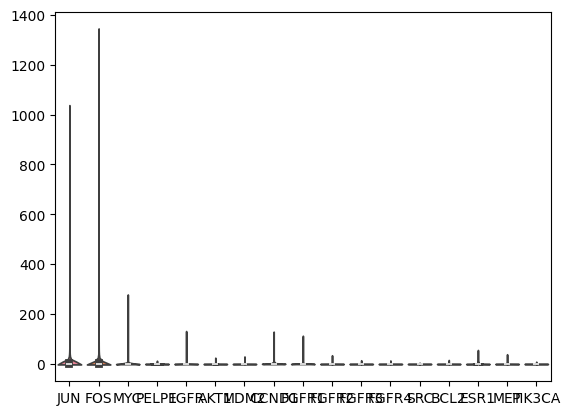

In [15]:
import seaborn as sns
#proto_onco_genes = ['JUN', 'FOS', 'MYC', 'H19', 'PELP1']
proto_onco_genes = ['JUN', 'FOS', 'MYC', 'H19', 'PELP1', 'HER2', 'RAS', 'EGFR', 'AKT1', 'MDM2', 'CCND1', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'SRC', 'BCL2', 'ESR1', 'MET', 'PIK3CA']

# Normalize gene names if available
if 'gene_name' in adata_combined2.var.columns:
    adata_combined2.var_names = adata_combined2.var['gene_name']

# Print missing genes
missing = [g for g in proto_onco_genes if g not in adata_combined2.var_names]
print("Missing genes:", missing)

# Filter only available ones
present = [g for g in proto_onco_genes if g in adata_combined2.var_names]

# Proceed if some genes are present
if present:
    gene_expr = adata_combined2[:, present].to_df()
    sns.violinplot(data=gene_expr)
else:
    print("None of the selected genes are found in var_names.")





--- Quantifying Gene Expression Levels ---
        Mean_Expression  Median_Expression  Max_Expression  \
Gene                                                         
JUN                4.14                1.0          1036.0   
FOS                4.02                1.0          1343.0   
MYC                1.22                0.0           278.0   
CCND1              1.14                0.0           129.0   
FGFR1              0.43                0.0           113.0   
ESR1               0.35                0.0            56.0   
AKT1               0.17                0.0            25.0   
EGFR               0.17                0.0           132.0   
MDM2               0.16                0.0            30.0   
MET                0.14                0.0            39.0   
PELP1              0.10                0.0            13.0   
PIK3CA             0.09                0.0             9.0   
BCL2               0.09                0.0            16.0   
SRC                0.04   

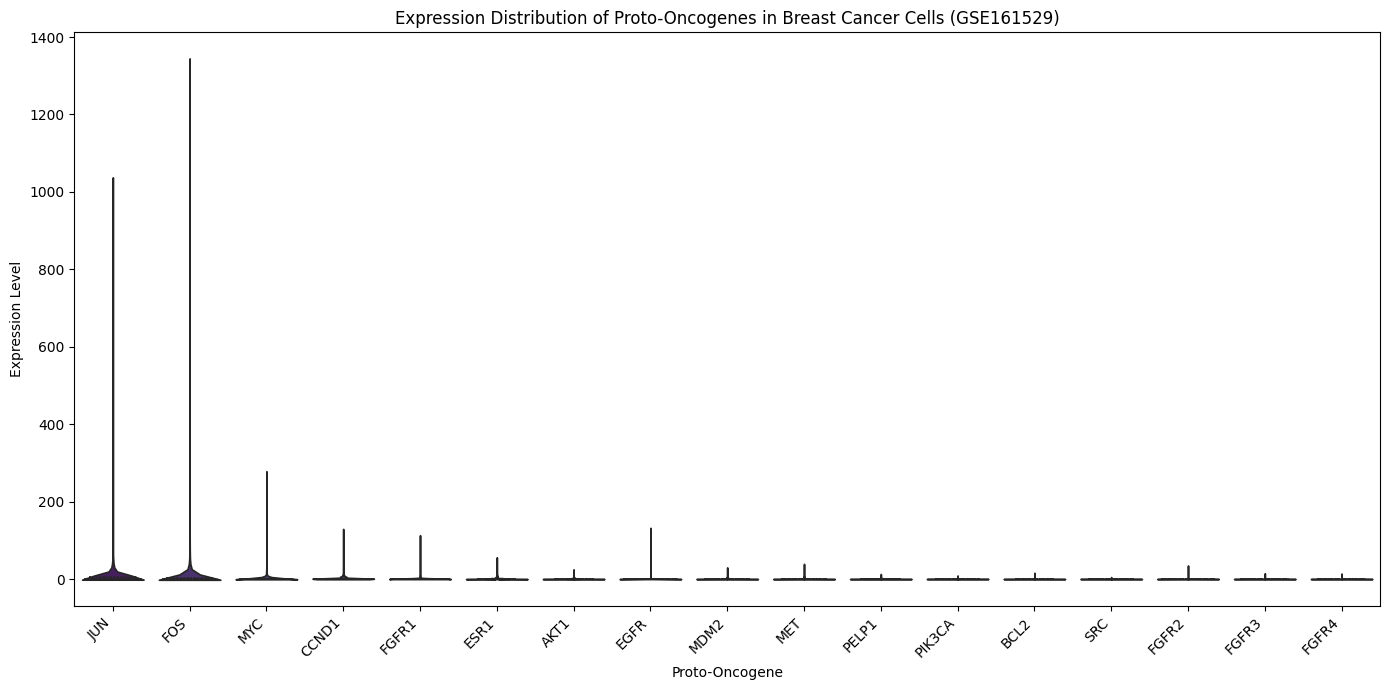

In [17]:
quantification_results = {}

if present: # Check if 'present' list actually contains genes
    print("\n--- Quantifying Gene Expression Levels ---")
    for gene in present:
        expression_values = gene_expr[gene] # Directly use gene_expr DataFrame

        # Calculate statistics
        mean_expr = expression_values.mean()
        median_expr = expression_values.median()
        max_expr = expression_values.max()
        # Calculate percentage of cells with expression > 0
        percent_expressing = (expression_values > 0).sum() / len(expression_values) * 100

        quantification_results[gene] = {
            'Mean_Expression': mean_expr,
            'Median_Expression': median_expr,
            'Max_Expression': max_expr,
            'Percent_Expressing_Cells': percent_expressing
        }

    # Convert results to a DataFrame for pretty printing
    results_df = pd.DataFrame.from_dict(quantification_results, orient='index')
    results_df.index.name = 'Gene'
    # Sort by a relevant column, e.g., Mean_Expression, for easier review
    results_df = results_df.sort_values(by='Mean_Expression', ascending=False)

    print(results_df.round(2)) # Round to 2 decimal places for cleaner output

    # Optional: Re-create the violin plot with the 'gene_expr' for visual confirmation
    # If you want to order the plot based on mean expression, you can set the order parameter
    plt.figure(figsize=(14, 7))
    sns.violinplot(data=gene_expr[results_df.index], inner="quartile", palette="viridis") # Use sorted index for order
    plt.title('Expression Distribution of Proto-Oncogenes in Breast Cancer Cells (GSE161529)')
    plt.ylabel('Expression Level')
    plt.xlabel('Proto-Oncogene')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("No genes were found in the 'present' list. No quantification or plot generated.")




Missing genes: []
        Ghost_Mean  Ghost_Median  Ghost_Max  Ghost_%Expressing  NonGhost_Mean  \
Gene                                                                            
PIK3CA        0.02           0.0        3.0               1.82           0.10   
ERBB2         0.08           0.0       16.0               5.18           0.95   
ZEB1          0.03           0.0        3.0               2.39           0.08   
SNAI1         0.00           0.0        5.0               0.40           0.07   
SNAI2         0.00           0.0        3.0               0.32           0.11   
TWIST1        0.00           0.0        3.0               0.23           0.03   
MMP9          0.03           0.0       82.0               0.85           0.16   

        NonGhost_Median  NonGhost_Max  NonGhost_%Expressing  
Gene                                                         
PIK3CA              0.0           9.0                  8.68  
ERBB2               0.0         188.0                 18.24  
ZEB1

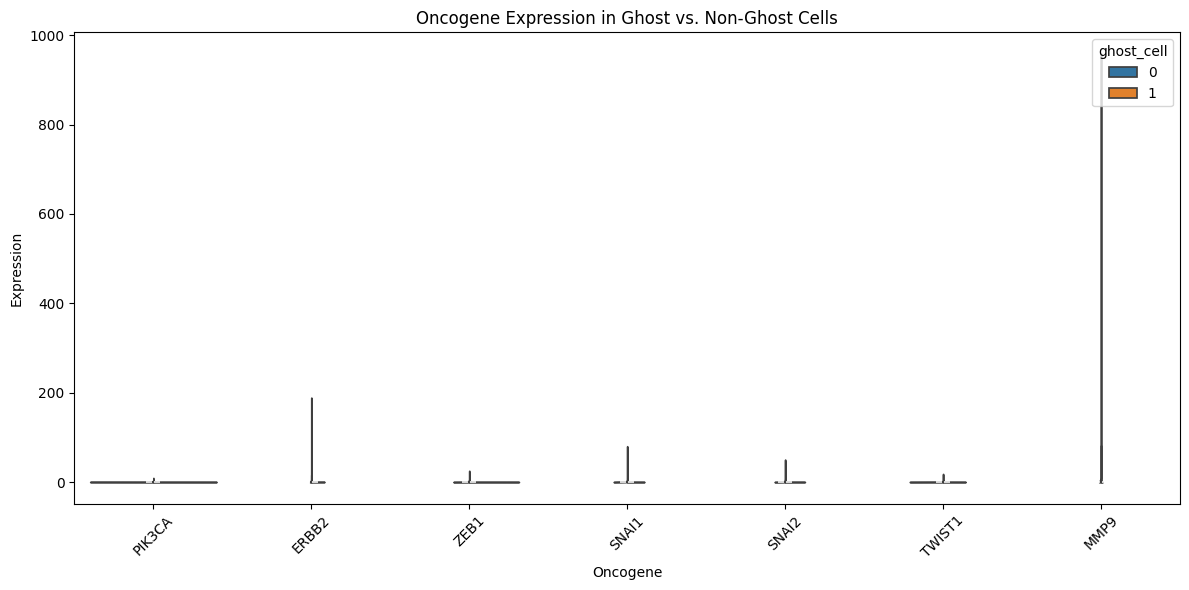

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define target oncogenes
oncogenes = ['PIK3CA', 'ERBB2', 'ZEB1', 'SNAI1', 'SNAI2', 'TWIST1', 'MMP9']

# Optional: ensure var_names use gene symbols
if 'gene_name' in adata_combined2.var.columns:
    adata_combined2.var_names = adata_combined2.var['gene_name']

# Check which genes are present
missing_oncogenes = [g for g in oncogenes if g not in adata_combined2.var_names]
print("Missing genes:", missing_oncogenes)
present_oncogenes = [g for g in oncogenes if g in adata_combined2.var_names]

# Extract expression
expr_onco = adata_combined2[:, present_oncogenes].to_df()
expr_onco['ghost_cell'] = adata_combined2.obs['ghost_cell'].values

# Split by ghost vs. non-ghost
summary = {}
for gene in present_oncogenes:
    ghost = expr_onco[expr_onco['ghost_cell'] == 1][gene]
    non_ghost = expr_onco[expr_onco['ghost_cell'] == 0][gene]
    
    summary[gene] = {
        'Ghost_Mean': ghost.mean(),
        'Ghost_Median': ghost.median(),
        'Ghost_Max': ghost.max(),
        'Ghost_%Expressing': (ghost > 0).mean() * 100,
        'NonGhost_Mean': non_ghost.mean(),
        'NonGhost_Median': non_ghost.median(),
        'NonGhost_Max': non_ghost.max(),
        'NonGhost_%Expressing': (non_ghost > 0).mean() * 100
    }

# Display results
onco_df = pd.DataFrame.from_dict(summary, orient='index')
onco_df.index.name = 'Gene'
onco_df = onco_df.round(2)
print(onco_df)

# Violin plot for visualization
plt.figure(figsize=(12, 6))
sns.violinplot(data=pd.melt(expr_onco, id_vars='ghost_cell', value_vars=present_oncogenes),
               x='variable', y='value', hue='ghost_cell', split=True)
plt.title('Oncogene Expression in Ghost vs. Non-Ghost Cells')
plt.xlabel('Oncogene')
plt.ylabel('Expression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
print(adata_combined2.obs.columns)


Index(['sample', 'sample_id', 'n_genes'], dtype='object')


In [195]:
sc.pl.umap(adata_combined2, color=['JUN', 'FOS', 'MYC', 'PELP1'], cmap='viridis')
sc.pl.dotplot(adata_combined2, ['JUN', 'FOS', 'MYC', 'PELP1'], groupby='leiden')


... storing 'sample' as categorical


KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

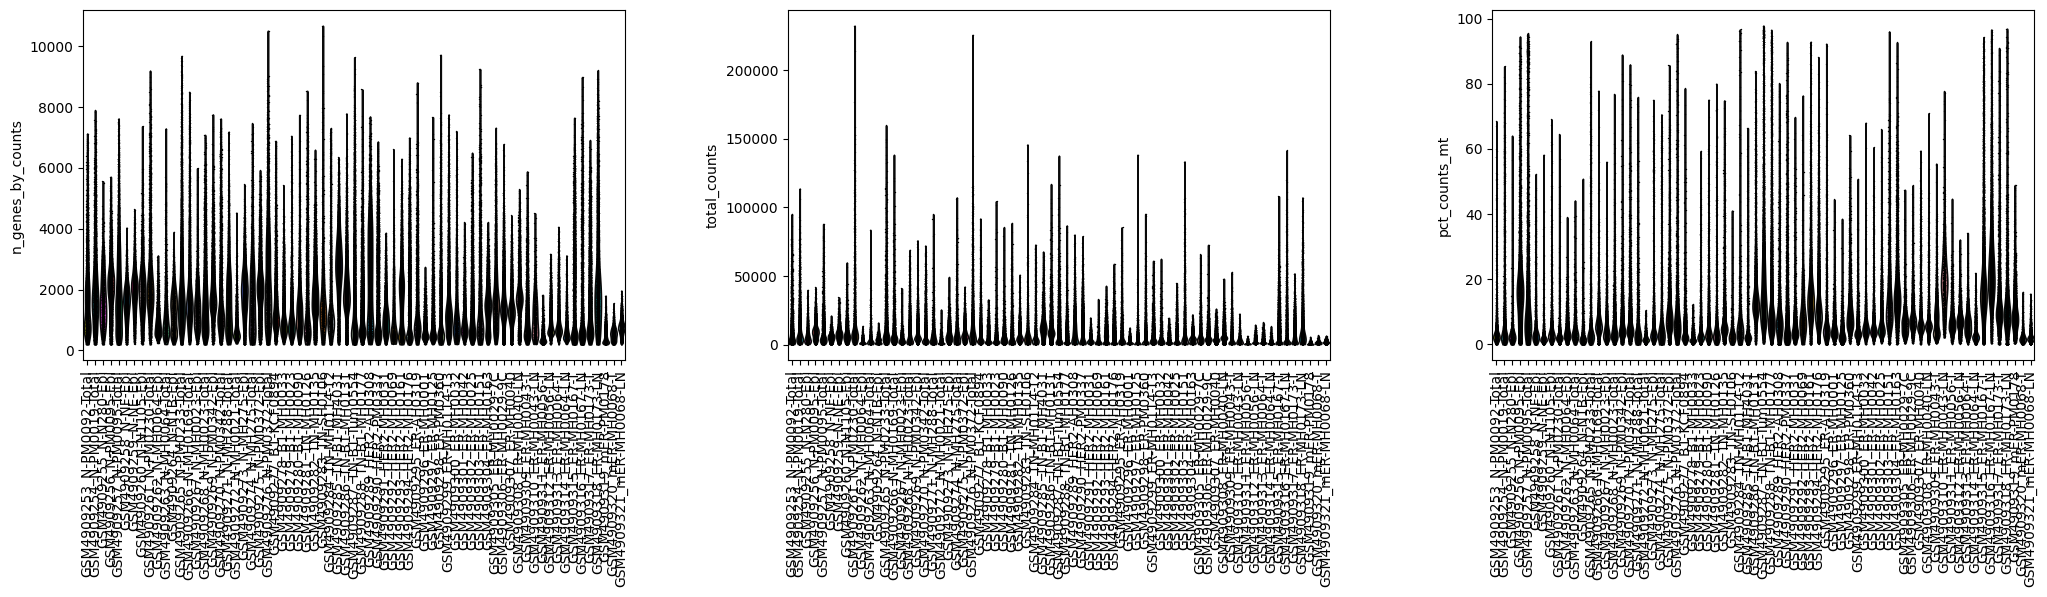

In [20]:
# Tag mitochondrial genes (starting with 'MT-')
adata_combined2.var["mt"] = adata_combined2.var_names.str.upper().str.startswith("MT-")

# Compute total counts, % mito, etc.
sc.pp.calculate_qc_metrics(adata_combined2, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

# Optional: visualize QC metrics
sc.pl.violin(adata_combined2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], groupby='sample_id', rotation=90)


In [21]:
adata_combined2.obs["ghost_cell"] = (
    (adata_combined2.obs["total_counts"] < 1500) |
    (adata_combined2.obs["pct_counts_mt"] > 10)
).astype(int)

In [22]:
adata_combined2.var["mt"] = adata_combined2.var_names.str.upper().str.startswith("MT-")

# Compute QC metrics (this populates total_counts, pct_counts_mt, etc.)
sc.pp.calculate_qc_metrics(
    adata_combined2,
    qc_vars=["mt"],
    percent_top=None,
    log1p=False,
    inplace=True
)

In [23]:
print(adata_combined2.obs.columns[:20])

Index(['sample', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'ghost_cell'],
      dtype='object')


In [27]:
gene_expr = adata_combined2[:, present].to_df()
gene_expr['ghost_cell'] = adata_combined2.obs['ghost_cell']  # 0 = non-ghost, 1 = ghost

# Convert to long format for seaborn
long_df = gene_expr.melt(id_vars='ghost_cell', var_name='Gene', value_name='Expression')
long_df['ghost_cell'] = long_df['ghost_cell'].map({0: 'Non-Ghost', 1: 'Ghost'})

from scipy.stats import ttest_ind

print("--- T-test Results: Ghost vs Non-Ghost ---")
for gene in present:
    g_vals = gene_expr[gene_expr['ghost_cell'] == 1][gene]
    ng_vals = gene_expr[gene_expr['ghost_cell'] == 0][gene]
    tstat, pval = ttest_ind(g_vals, ng_vals)
    print(f"{gene}: p = {pval:.3e}")

--- T-test Results: Ghost vs Non-Ghost ---
JUN: p = 0.000e+00
FOS: p = 0.000e+00
MYC: p = 0.000e+00
PELP1: p = 0.000e+00
EGFR: p = 0.000e+00
AKT1: p = 0.000e+00
MDM2: p = 0.000e+00
CCND1: p = 0.000e+00
FGFR1: p = 0.000e+00
FGFR2: p = 5.221e-140
FGFR3: p = 6.222e-79
FGFR4: p = 4.085e-79
SRC: p = 9.422e-275
BCL2: p = 1.881e-161
ESR1: p = 0.000e+00
MET: p = 0.000e+00
PIK3CA: p = 0.000e+00


In [30]:
adata_combined2.obs["ghost_cell"] = (
    (adata_combined2.obs["total_counts"] < 1500) &
    (adata_combined2.obs["pct_counts_mt"] > 10)
).astype(int)

print(adata_combined2.obs["ghost_cell"].value_counts())


ghost_cell
0    379871
1     41274
Name: count, dtype: int64


In [31]:
if 'gene_name' in adata_combined2.var.columns:
    adata_combined2.var_names = adata_combined2.var['gene_name']

# Filter only genes that are actually present
present = [g for g in proto_onco_genes if g in adata_combined2.var_names]

# Extract expression data
gene_expr = adata_combined2[:, present].to_df()
gene_expr['ghost_cell'] = adata_combined2.obs['ghost_cell']

# Split into ghost and non-ghost
ghost_cells = gene_expr[gene_expr['ghost_cell'] == 1]
non_ghost_cells = gene_expr[gene_expr['ghost_cell'] == 0]

# Compute descriptive stats
summary_data = []

for gene in present:
    ghost_vals = ghost_cells[gene]
    non_ghost_vals = non_ghost_cells[gene]

    summary_data.append({
        'Gene': gene,
        'Ghost_Mean': ghost_vals.mean(),
        'Ghost_Median': ghost_vals.median(),
        'Ghost_Max': ghost_vals.max(),
        'Ghost_%Expressing': (ghost_vals > 0).sum() / len(ghost_vals) * 100,
        'NonGhost_Mean': non_ghost_vals.mean(),
        'NonGhost_Median': non_ghost_vals.median(),
        'NonGhost_Max': non_ghost_vals.max(),
        'NonGhost_%Expressing': (non_ghost_vals > 0).sum() / len(non_ghost_vals) * 100,
    })

summary_df = pd.DataFrame(summary_data).set_index('Gene').round(2)
print(summary_df)


        Ghost_Mean  Ghost_Median  Ghost_Max  Ghost_%Expressing  NonGhost_Mean  \
Gene                                                                            
JUN           0.79           0.0       47.0              37.94           4.50   
FOS           0.86           0.0       69.0              39.77           4.36   
MYC           0.07           0.0       19.0               5.00           1.35   
PELP1         0.01           0.0        3.0               1.36           0.11   
EGFR          0.01           0.0        5.0               0.71           0.19   
AKT1          0.03           0.0        4.0               2.66           0.19   
MDM2          0.03           0.0        4.0               2.86           0.17   
CCND1         0.12           0.0        9.0               8.56           1.25   
FGFR1         0.03           0.0        7.0               2.86           0.47   
FGFR2         0.00           0.0        3.0               0.35           0.04   
FGFR3         0.00          

In [153]:
print(sorted(adata_combined2.obs["sample_id"].unique()))

def classify_sample(sample_id):
    # PBMC if sample name contains '-N-' or starts with 'GSM' + '_N-'
    if "_N-" in sample_id or "-N" in sample_id.split("_")[-1]:
        return "PBMC"
    else:
        return "Tumor"

# Apply this
adata_combined2.obs["source"] = adata_combined2.obs["sample_id"].apply(classify_sample)




['GSM4909253_N-PM0092-Total', 'GSM4909254_N-PM0019-Total', 'GSM4909255_N-N280-Epi', 'GSM4909256_N-PM0095-Epi', 'GSM4909257_N-PM0095-Total', 'GSM4909258_N-NF-Epi', 'GSM4909259_N-NE-Epi', 'GSM4909260_N-N1105-Epi', 'GSM4909261_N-PM0230-Total', 'GSM4909262_N-MH0064-Epi', 'GSM4909263_N-MH0064-Total', 'GSM4909264_N-N1B-Epi', 'GSM4909265_N-PM0233-Total', 'GSM4909266_N-MH0169-Total', 'GSM4909267_N-MH0023-Epi', 'GSM4909268_N-MH0023-Total', 'GSM4909269_N-PM0342-Epi', 'GSM4909270_N-PM0342-Total', 'GSM4909271_N-MH288-Total', 'GSM4909272_N-MH0021-Total', 'GSM4909273_N-MH275-Epi', 'GSM4909274_N-MH275-Total', 'GSM4909275_N-PM0372-Epi', 'GSM4909276_N-PM0372-Total', 'GSM4909277_B1-KCF0894', 'GSM4909278_B1-MH0033', 'GSM4909279_B1-MH0023', 'GSM4909280_B1-MH0090', 'GSM4909281_TN-MH0126', 'GSM4909282_TN-MH0135', 'GSM4909283_TN-SH0106', 'GSM4909284_TN-MH0114-T2', 'GSM4909285_TN-B1-MH4031', 'GSM4909286_TN-B1-MH0131', 'GSM4909287_TN-B1-Tum0554', 'GSM4909288_TN-B1-MH0177', 'GSM4909289_HER2-AH0308', 'GSM4909290

In [154]:
ghost_by_source = (
    adata_combined2.obs.groupby("source")["ghost_cell"]
    .agg(["count", "sum"])
    .rename(columns={"count": "total_cells", "sum": "ghost_cells"})
)
ghost_by_source["ghost_pct"] = (ghost_by_source["ghost_cells"] / ghost_by_source["total_cells"]) * 100

print(ghost_by_source)

        total_cells  ghost_cells  ghost_pct
source                                     
PBMC         119624         3668   3.066274
Tumor        301521        37606  12.472100


/Users/adi/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'source' as categorical


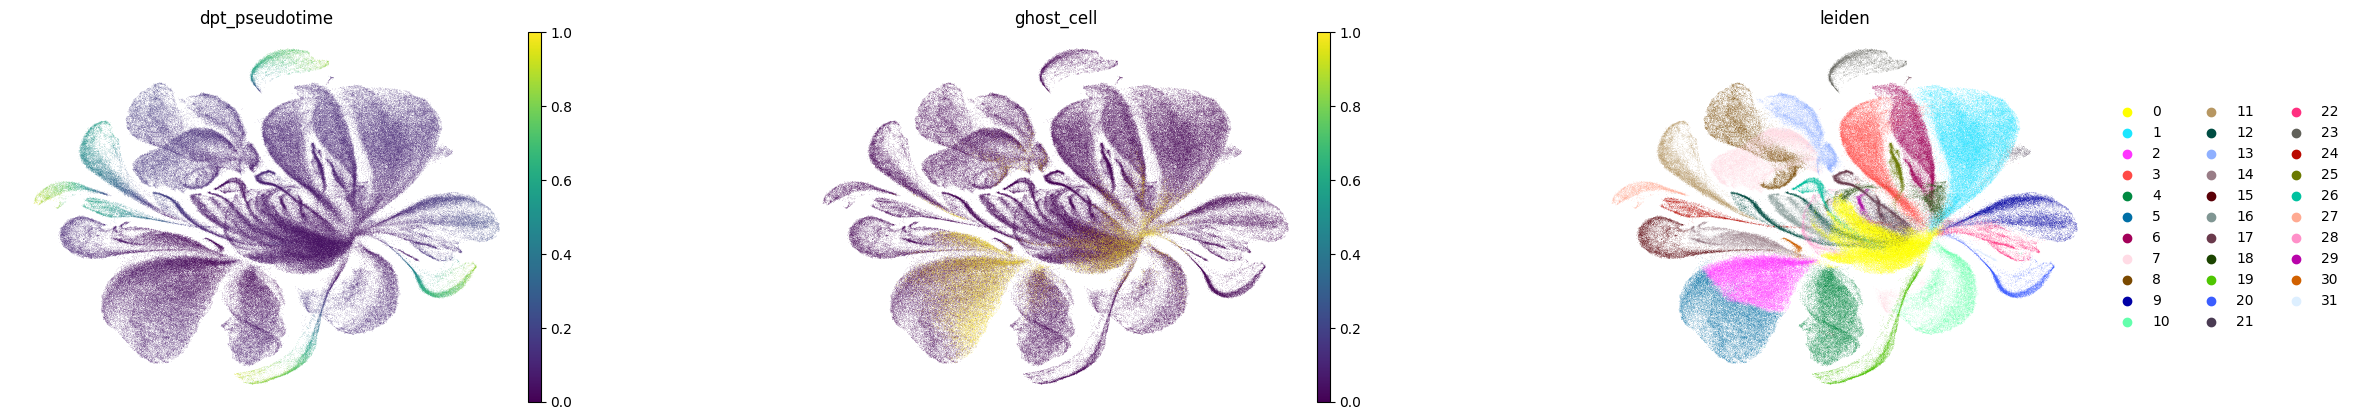

In [155]:
### Pseudotime anaysis

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Step 0: Skip re-logging, just ensure normalized
# (Optional: check if X values are <20 → likely already log-transformed)

# Step 1: Compute highly variable genes (no log1p)
sc.pp.highly_variable_genes(adata_combined2, flavor="seurat_v3", n_top_genes=2000)

# Step 2: Subset to HVGs
adata_combined2 = adata_combined2[:, adata_combined2.var.highly_variable]

# Step 3: Scale and PCA
sc.pp.scale(adata_combined2, max_value=10)
sc.tl.pca(adata_combined2, svd_solver='arpack')

# Step 4: Neighbors, Leiden, PAGA, UMAP
sc.pp.neighbors(adata_combined2, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_combined2, resolution=0.5)
sc.tl.paga(adata_combined2)
sc.tl.umap(adata_combined2)

# Step 5: Pick root ghost cell (safe approach)

ghost_cells = adata_combined2.obs.query("ghost_cell == 1")
valid_cluster = ghost_cells["leiden"].value_counts().idxmax()
root_cell = ghost_cells[ghost_cells["leiden"] == valid_cluster]["total_counts"].idxmin()
adata_combined2.uns["iroot"] = adata_combined2.obs_names.get_loc(root_cell)

# Step 6: Run pseudotime (DPT)
sc.tl.dpt(adata_combined2)

# Step 7: Plot UMAP with pseudotime and ghost label
sc.pl.umap(
    adata_combined2,
    color=["dpt_pseudotime", "ghost_cell", "leiden"],
    wspace=0.4,
    frameon=False
)

In [37]:
import scanpy as sc
print(sc.__version__)



1.10.3


✅ GTF file already exists.


INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


✅ Gene annotations successfully merged into adata_combined2.var


  0%|          | 0/85 [00:00<?, ?it/s]

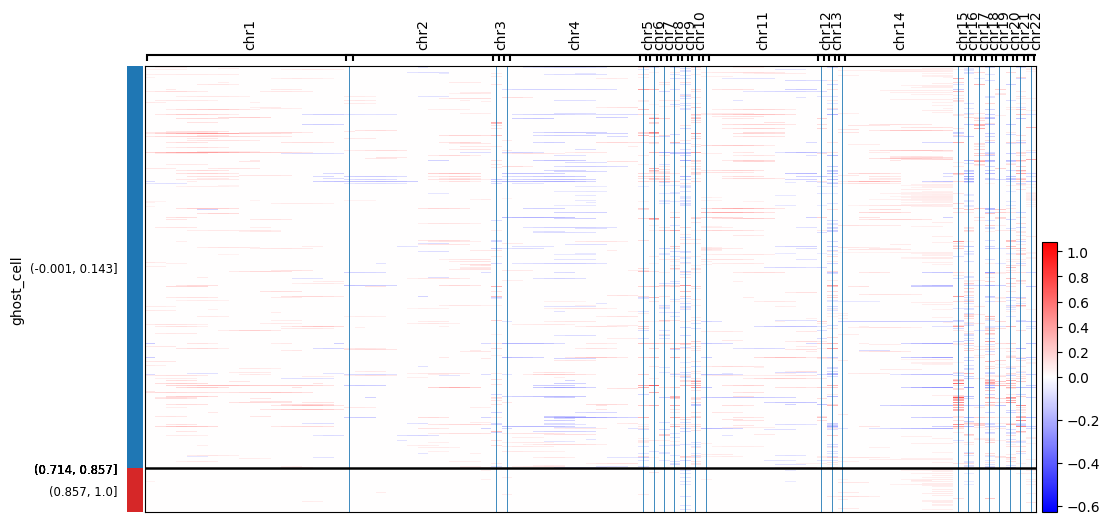

In [156]:
import os
import urllib.request
import pandas as pd
from gtfparse import read_gtf
import scanpy as sc
import infercnvpy as cnv

# --------------------------
# Step 1: Download GENCODE GTF (if not already downloaded)
# --------------------------
gtf_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz"
gtf_file = "gencode.v44.annotation.gtf.gz"

if not os.path.exists(gtf_file):
    print("📥 Downloading GTF file...")
    urllib.request.urlretrieve(gtf_url, gtf_file)
else:
    print("✅ GTF file already exists.")

# --------------------------
# Step 2: Read and filter GTF
# --------------------------
gtf = read_gtf(gtf_file).to_pandas()
genes = gtf[gtf["feature"] == "gene"]
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]

# --------------------------
# Step 3: Safely merge with adata_combined2.var
# --------------------------
# Step 3a: Copy and prepare .var
var = adata_combined2.var.copy()
var["gene"] = var.index

# Step 3b: Filter gene_pos to only matching genes
gene_pos_filtered = gene_pos[gene_pos["gene"].isin(var["gene"])].drop_duplicates(subset="gene")
gene_pos_filtered = gene_pos_filtered.set_index("gene")

# Step 3c: Join and reindex to ensure exact match
merged_var = var.join(gene_pos_filtered, on="gene")
merged_var = merged_var.reindex(adata_combined2.var_names)

# Step 3d: Assign back to AnnData
adata_combined2.var = merged_var
print("✅ Gene annotations successfully merged into adata_combined2.var")

# --------------------------
# Step 4: Run inferCNV
# --------------------------
cnv.tl.infercnv(
    adata_combined2,
    reference_key="source",     # Make sure .obs['source'] has 'PBMC'
    reference_cat=["PBMC"],
    window_size=100
)

# --------------------------
# Step 5: Plot heatmap grouped by ghost_cell
# --------------------------
cnv.pl.chromosome_heatmap(adata_combined2, groupby="ghost_cell", figsize=(12, 6))



In [157]:
pip install scanpy infercnvpy gtfparse


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Figure size 1400x500 with 0 Axes>

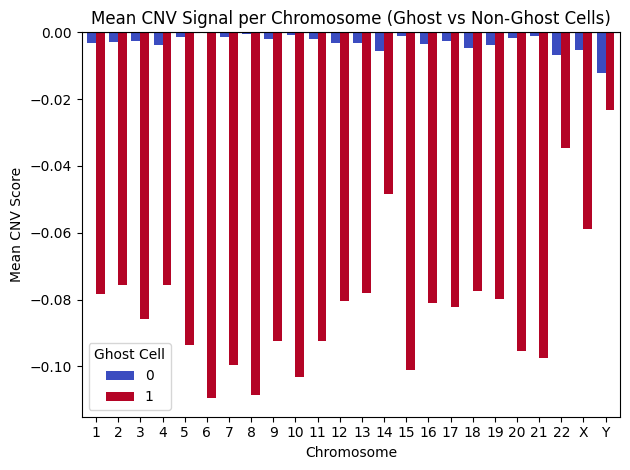

In [158]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure gene annotations exist
adata_combined2.var["chromosome"] = adata_combined2.var["chromosome"].astype(str).str.replace("chr", "").str.upper()
valid_chroms = [str(i) for i in range(1, 23)] + ["X", "Y"]
adata_combined2 = adata_combined2[:, adata_combined2.var["chromosome"].isin(valid_chroms)]

cnv_df = pd.DataFrame(adata_combined2.X.toarray(), index=adata_combined2.obs_names, columns=adata_combined2.var_names)
gene_chr_map = adata_combined2.var["chromosome"].to_dict()

chrom_cnv = {}
for chrom in valid_chroms:
    genes = [g for g, c in gene_chr_map.items() if c == chrom]
    if genes:
        chrom_cnv[chrom] = cnv_df[genes].mean(axis=1)

chrom_cnv_df = pd.DataFrame(chrom_cnv)
chrom_cnv_df["ghost_cell"] = adata_combined2.obs["ghost_cell"].values
cnv_summary = chrom_cnv_df.groupby("ghost_cell").mean().T

plt.figure(figsize=(14, 5))
cnv_summary.plot(kind="bar", width=0.8, colormap="coolwarm")
plt.axhline(0, color="black", linestyle="--")
plt.title("Mean CNV Signal per Chromosome (Ghost vs Non-Ghost Cells)")
plt.ylabel("Mean CNV Score")
plt.xlabel("Chromosome")
plt.xticks(rotation=0)
plt.legend(title="Ghost Cell")
plt.tight_layout()
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/881954899.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_combined2.var["chromosome"] = adata_combined2.var["chromosome"].astype(str).str.replace("chr", "").str.upper()
/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/881954899.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_cnv = chrom_cnv_df.groupby("leiden").mean()
/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/881954899.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/adi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.

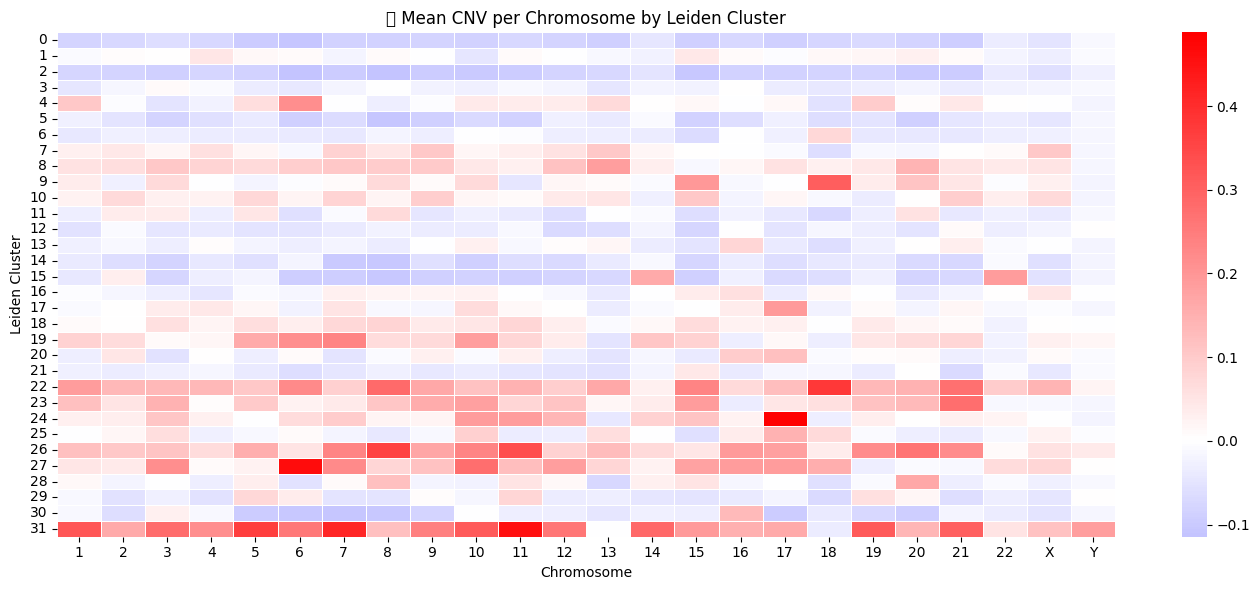

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure chromosome formatting and keep standard chromosomes
adata_combined2.var["chromosome"] = adata_combined2.var["chromosome"].astype(str).str.replace("chr", "").str.upper()
valid_chroms = [str(i) for i in range(1, 23)] + ["X", "Y"]
adata_combined2 = adata_combined2[:, adata_combined2.var["chromosome"].isin(valid_chroms)]

# Step 2: Build gene → chromosome map
gene_chr_map = adata_combined2.var["chromosome"].to_dict()

# Step 3: Build CNV dataframe
cnv_df = pd.DataFrame(adata_combined2.X.toarray(), index=adata_combined2.obs_names, columns=adata_combined2.var_names)

# Step 4: Compute mean CNV per chromosome per cell
chrom_cnv = {}
for chrom in valid_chroms:
    genes = [g for g, c in gene_chr_map.items() if c == chrom]
    if genes:
        chrom_cnv[chrom] = cnv_df[genes].mean(axis=1)

chrom_cnv_df = pd.DataFrame(chrom_cnv)
chrom_cnv_df["leiden"] = adata_combined2.obs["leiden"].values

# Step 5: Group by Leiden cluster and compute mean CNV per chromosome
cluster_cnv = chrom_cnv_df.groupby("leiden").mean()

# Step 6: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_cnv.astype(float), cmap="bwr", center=0, linewidths=0.5, annot=False)
plt.title("📊 Mean CNV per Chromosome by Leiden Cluster")
plt.ylabel("Leiden Cluster")
plt.xlabel("Chromosome")
plt.tight_layout()
plt.show()


In [173]:
# Ensure chromosome column is consistent
adata_combined2.var["chromosome"] = adata_combined2.var["chromosome"].astype(str).str.replace("chr", "").str.upper()

# Extract genes from top CNV-affected chromosomes
selected_chroms = ["6", "7", "10", "14", "18", "22"]
cnv_genes = adata_combined2.var[adata_combined2.var["chromosome"].isin(selected_chroms)]

# Format for display
genes_by_chr = {
    chrom: cnv_genes[cnv_genes["chromosome"] == chrom].index.tolist()
    for chrom in selected_chroms
}

import pandas as pd
flat_gene_list = [
    {"chromosome": chrom, "gene": gene}
    for chrom, genes in genes_by_chr.items()
    for gene in genes
]
genes_df = pd.DataFrame(flat_gene_list)
genes_df.head(20)


chromosome       gene
0           6      FOXC1
1           6     TUBB2B
2           6  LINC02533
3           6       NRN1
4           6      F13A1
5           6     TFAP2A
6           6  LINC00518
7           6    TMEM14C
8           6    TMEM14B
9           6     ELOVL2
10          6       EDN1
11          6    PHACTR1
12          6       CD83
13          6    RNF144B
14          6        ID4
15          6        PRL
16          6     BTN1A1
17          6    C6orf15
18          6       CDSN
19          6   PSORS1C2

In [174]:
# List of chromosomes you are interested in
selected_chroms =  ["6", "7", "10", "14", "18", "22"]

# Ensure 'chromosome' column is clean
adata_combined2.var["chromosome"] = adata_combined2.var["chromosome"].astype(str).str.replace("chr", "").str.upper()

# Filter for selected chromosomes
filtered_genes = adata_combined2.var[adata_combined2.var["chromosome"].isin(selected_chroms)].copy()

# Extract top 10 genes per chromosome
top_genes_by_chr = (
    filtered_genes.groupby("chromosome")
    .apply(lambda df: df.head(10))
    .reset_index(drop=True)
)

top_genes_by_chr[["chromosome", "gene"]].head(60)


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/3931780074.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_genes.groupby("chromosome")


chromosome         gene
0          10       AKR1C1
1          10       AKR1C2
2          10       AKR1C3
3          10       CALML5
4          10       CALML3
5          10        IL2RA
6          10        LINP1
7          10        ITIH2
8          10  ST8SIA6-AS1
9          10         MRC1
10         14          PNP
11         14       RNASE6
12         14       RNASE1
13         14        NDRG2
14         14       RNASE7
15         14       TRAV22
16         14         TRDC
17         14         TRAC
18         14        DHRS2
19         14         CMA1
20         18         TYMS
21         18      ADCYAP1
22         18        NDC80
23         18    LINC00668
24         18        LAMA3
25         18         DSC1
26         18         DSG1
27         18         DSG3
28         18          TTR
29         18      SLC14A1
30         22        CLDN5
31         22     IGLVI-70
32         22     IGLV4-69
33         22    IGLV10-54
34         22     IGLV8-61
35         22     IGLV4-60
36         22     IGLV6-57
37         22     IGLV5-52
38         22     IGLV1-51
39         22     IGLV9-49
40          6        FOXC1
41          6       TUBB2B
42          6    LINC02533
43          6         NRN1
44          6        F13A1
45          6       TFAP2A
46          6    LINC00518
47          6      TMEM14C
48          6      TMEM14B
49          6       ELOVL2
50          7      ZFAND2A
51          7        INTS1
52          7      SOSTDC1
53          7         AGR2
54          7         AGR3
55          7        MACC1
56          7          IL6
57          7        GPNMB
58          7          NPY
59          7        SNX10

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/790164909.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_df = adata_combined2.obs.groupby("leiden").agg({


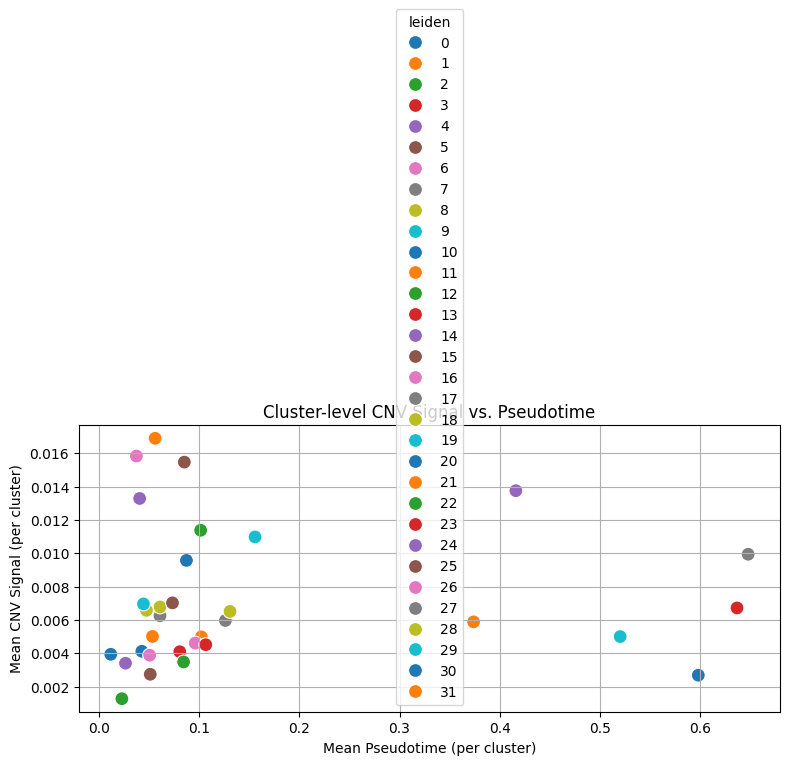

<Axes: xlabel='dpt_pseudotime', ylabel='mean_cnv'>

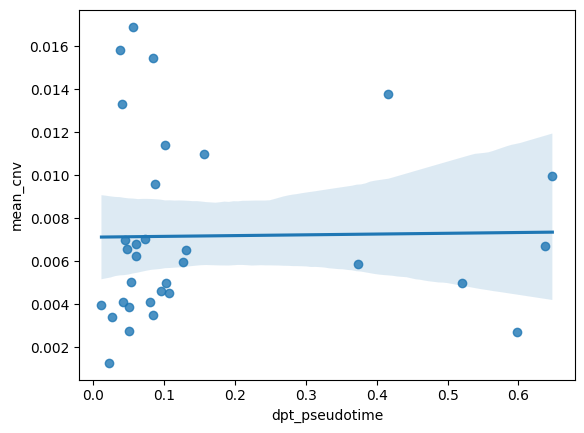

In [175]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Compute mean CNV signal per cell
adata_combined2.obs["mean_cnv"] = adata_combined2.obsm["X_cnv"].mean(axis=1)

# STEP 2: Group by cluster to summarize CNV and pseudotime
cluster_df = adata_combined2.obs.groupby("leiden").agg({
    "dpt_pseudotime": "mean",
    "mean_cnv": "mean"
}).reset_index()

# STEP 3: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluster_df,
    x="dpt_pseudotime",
    y="mean_cnv",
    hue="leiden",
    palette="tab10",
    s=100
)
plt.title("Cluster-level CNV Signal vs. Pseudotime")
plt.xlabel("Mean Pseudotime (per cluster)")
plt.ylabel("Mean CNV Signal (per cluster)")
plt.grid(True)
plt.tight_layout()
plt.show()

sns.regplot(data=cluster_df, x="dpt_pseudotime", y="mean_cnv")



In [163]:
from scipy.stats import spearmanr
corr, pval = spearmanr(cluster_df["dpt_pseudotime"], cluster_df["mean_cnv"])
print(f"Spearman correlation: {corr:.3f} (p={pval:.3g})")


Spearman correlation: 0.179 (p=0.326)


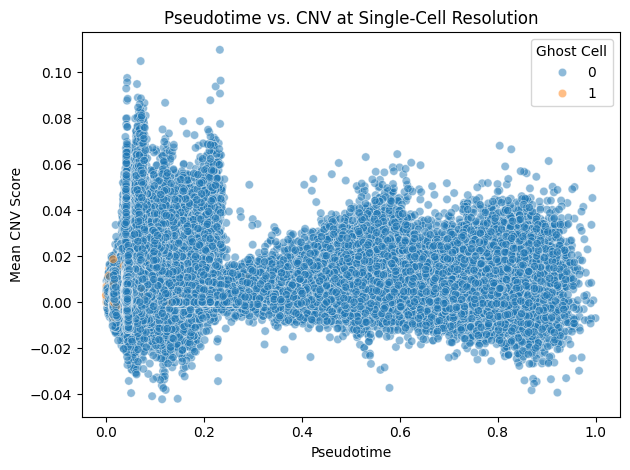

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=adata_combined2.obs,
    x="dpt_pseudotime",
    y="mean_cnv",
    hue="ghost_cell",
    alpha=0.5
)
plt.title("Pseudotime vs. CNV at Single-Cell Resolution")
plt.xlabel("Pseudotime")
plt.ylabel("Mean CNV Score")
plt.legend(title="Ghost Cell")
plt.tight_layout()
plt.show()


In [165]:
early_cells = adata_combined2.obs[
    (adata_combined2.obs["dpt_pseudotime"] < 0.2) &
    (adata_combined2.obs["mean_cnv"] > 0.01)
]
print("⚠️ Potential early-transitioning cells:", early_cells.shape[0])

⚠️ Potential early-transitioning cells: 70951


In [166]:
# Review source and cluster identity
early_cells_summary = early_cells.groupby(["source", "leiden"]).size().reset_index(name="count")
print(early_cells_summary.sort_values("count", ascending=False).head(10))


   source leiden  count
36  Tumor      4   9876
1    PBMC      1   8114
47  Tumor     15   6403
42  Tumor     10   5106
41  Tumor      9   3793
7    PBMC      7   3496
3    PBMC      3   3458
32  Tumor      0   3047
6    PBMC      6   2488
54  Tumor     22   2365


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/3849886160.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  early_cells_summary = early_cells.groupby(["source", "leiden"]).size().reset_index(name="count")


... storing 'chromosome' as categorical


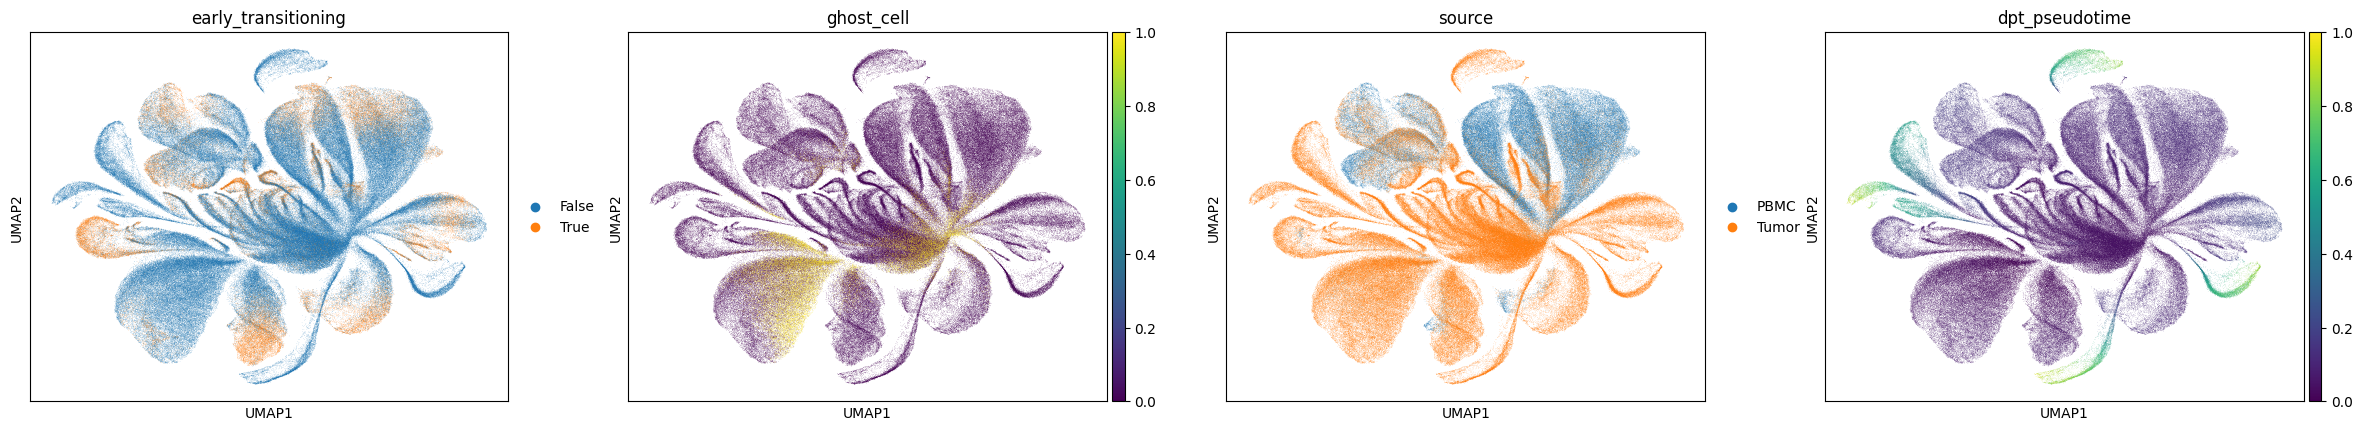

In [167]:
adata_combined2.obs["early_transitioning"] = (
    (adata_combined2.obs["dpt_pseudotime"] < 0.2) &
    (adata_combined2.obs["mean_cnv"] > 0.01)
)
sc.pl.umap(adata_combined2, color=["early_transitioning", "ghost_cell", "source", "dpt_pseudotime"])


/Users/adi/Library/Python/3.9/lib/python/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


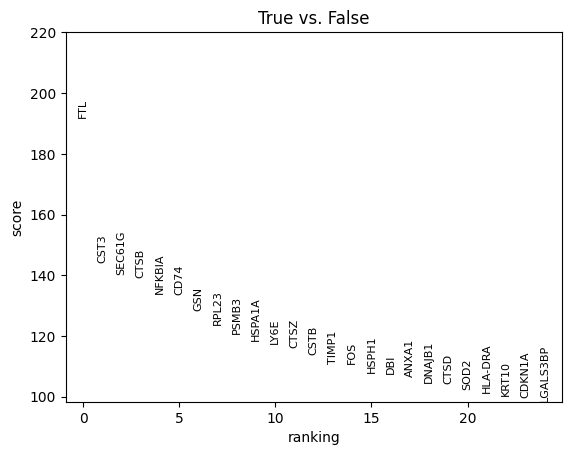

In [168]:
# Step 1: Subset the data
adata_sub = adata_combined2[adata_combined2.obs["early_transitioning"].notnull()].copy()

# Step 2: Convert grouping variable to categorical if needed
adata_sub.obs["early_transitioning"] = adata_sub.obs["early_transitioning"].astype("category")

# Step 3: Run differential expression
sc.tl.rank_genes_groups(
    adata_sub,
    groupby="early_transitioning",
    reference=False,  # Boolean not string
    method="wilcoxon"
)

# Step 4: Plot results
sc.pl.rank_genes_groups(adata_sub, n_genes=25, sharey=False)



/Users/adi/Library/Python/3.9/lib/python/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_37958/1260867915.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = expr_df.groupby("early_transitioning").apply(lambda x: x.sample(n=min(150, len(x)), random_state=1))


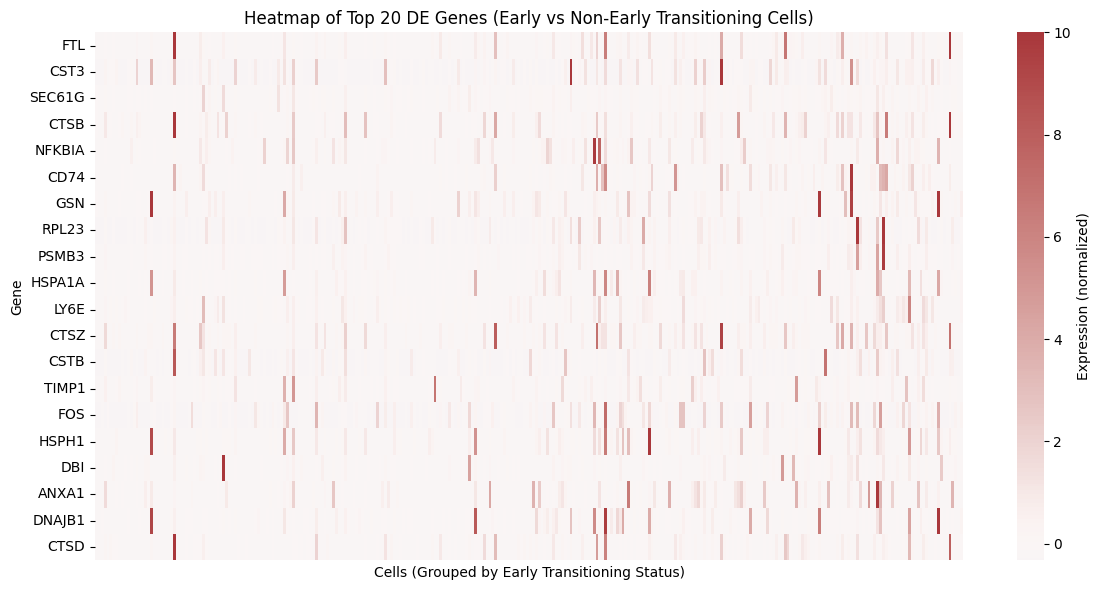

In [169]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Subset data to cells with early_transitioning label
adata_sub = adata_combined2[adata_combined2.obs["early_transitioning"].notnull()].copy()
adata_sub.obs["early_transitioning"] = adata_sub.obs["early_transitioning"].astype("category")

# Re-run differential expression
sc.tl.rank_genes_groups(
    adata_sub,
    groupby="early_transitioning",
    reference=False,
    method="wilcoxon"
)

# Get top 20 genes
top_genes = adata_sub.uns["rank_genes_groups"]["names"]["True"][:20].tolist()

# Extract expression matrix
expr_data = adata_sub[:, top_genes].X.toarray()
expr_df = pd.DataFrame(expr_data, columns=top_genes, index=adata_sub.obs_names)
expr_df["early_transitioning"] = adata_sub.obs["early_transitioning"].astype(str)

# Sample balanced number of cells from each group for visual clarity
sampled_df = expr_df.groupby("early_transitioning").apply(lambda x: x.sample(n=min(150, len(x)), random_state=1))
sampled_df.index = sampled_df.index.droplevel(0)

# Prepare matrix for heatmap
labels = sampled_df["early_transitioning"]
gene_matrix = sampled_df.drop(columns="early_transitioning")

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(
    gene_matrix.transpose(),
    cmap="vlag",
    center=0,
    yticklabels=True,
    xticklabels=False,
    cbar_kws={"label": "Expression (normalized)"},
)
plt.title("Heatmap of Top 20 DE Genes (Early vs Non-Early Transitioning Cells)")
plt.ylabel("Gene")
plt.xlabel("Cells (Grouped by Early Transitioning Status)")
plt.tight_layout()
plt.show()


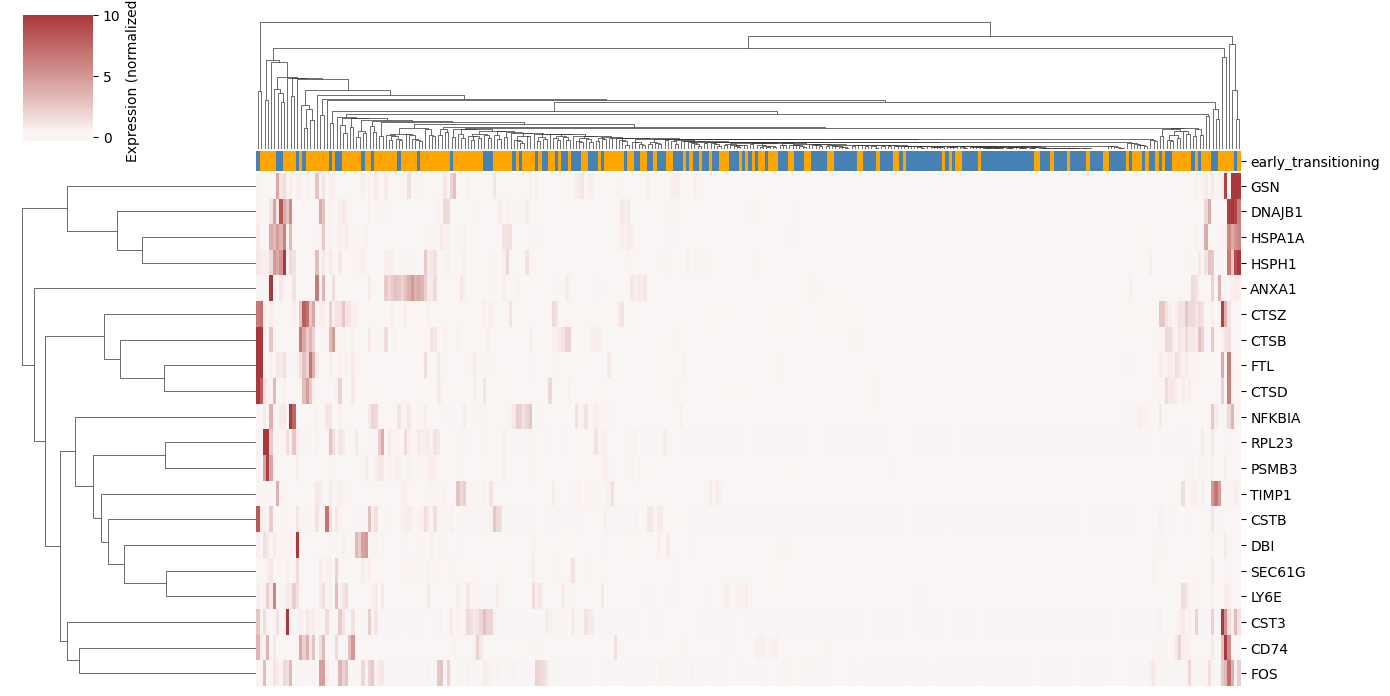

In [115]:
# Optional: create color labels for heatmap columns
group_colors = labels.map({"True": "orange", "False": "steelblue"})

# Re-plot with column colors
sns.clustermap(
    gene_matrix.transpose(),
    cmap="vlag",
    center=0,
    col_colors=group_colors,
    xticklabels=False,
    yticklabels=True,
    figsize=(14, 7),
    cbar_kws={"label": "Expression (normalized)"}
)


Text(0.5, 1.0, 'UMI distribution')

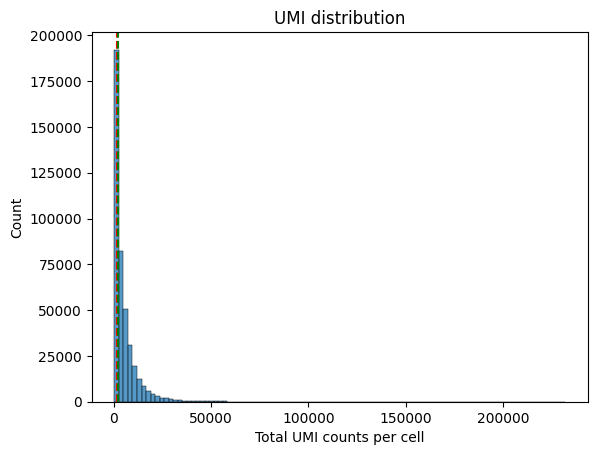

In [182]:
import seaborn as sns
sns.histplot(adata_combined2.obs['total_counts'], bins=100)
plt.axvline(1500, color='red', linestyle='--')
plt.axvline(2000, color='green', linestyle='--')
plt.xlabel("Total UMI counts per cell")
plt.title("UMI distribution")

In [180]:
adata_combined2.obs['ghost_cell'] = (
    (adata_combined2.obs['total_counts'] < 2000) &
    (adata_combined2.obs['pct_counts_mt'] < 10)
)